## Make sample dataset

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
X, y = make_blobs(n_samples=1000, n_features=20 , centers=4, random_state=42)

In [3]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.280887,-6.254320,-4.641365,-2.718692,-0.895169,6.386844,-5.415780,0.064575,1.911940,-9.442771,0.673285,-6.331917,-6.806776,8.093992,8.539611,5.297219,-3.183133,-7.598072,3.526123,-2.114969
1,-0.849932,-4.371952,5.609354,-3.454451,-5.146791,0.810376,-7.008624,7.939514,-10.425288,9.702926,5.129328,-5.079138,-9.534740,6.899591,4.482233,3.648152,6.636672,-7.720602,-1.915156,-6.418569
2,-2.009513,9.486288,4.715834,2.715852,-6.397378,-8.117772,-7.969172,8.210814,1.259014,4.199389,-8.904981,9.188883,7.721831,-3.389345,-7.149487,-7.712954,-3.611337,1.216691,-1.591966,-2.722157
3,-1.801535,-2.896369,7.581001,-0.524633,-5.038080,2.530111,-7.972189,6.397506,-7.776511,9.226962,5.532860,-5.115225,-10.599829,7.978612,2.752550,6.519835,6.426733,-8.608833,-3.233354,-8.189647
4,-1.707018,-5.733040,8.231073,-0.940088,-4.334205,3.277028,-7.580543,6.444372,-7.077098,9.278734,4.063346,-7.637403,-7.828731,5.780204,3.951410,3.467379,6.373746,-9.300667,-3.321948,-7.383098


In [5]:
pd.Series(y).head()

0    1
1    3
2    0
3    3
4    3
dtype: int64

<Axes: title={'center': 'Plotting all features'}>

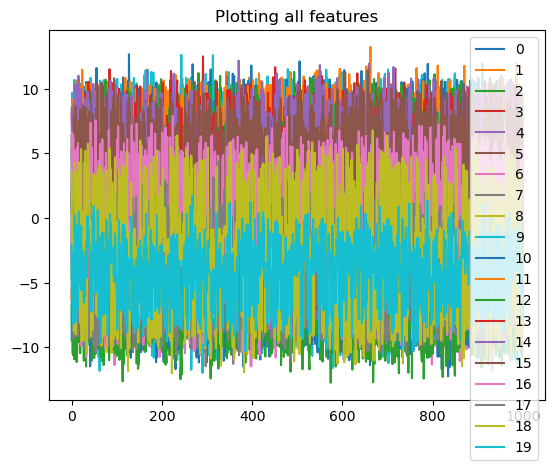

In [7]:
pd.DataFrame(X).plot(title = 'Plotting all features')

### Report creation

                                             |      | [  0%]   00:00 -> (? left)


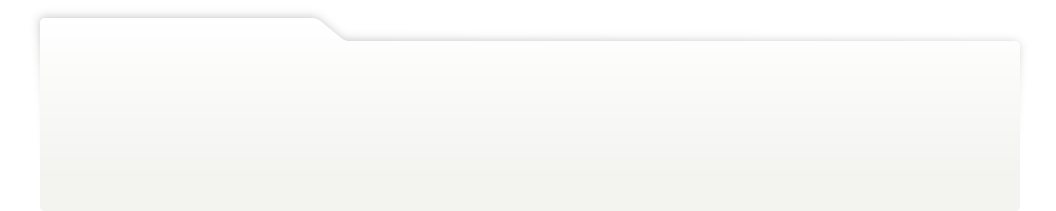
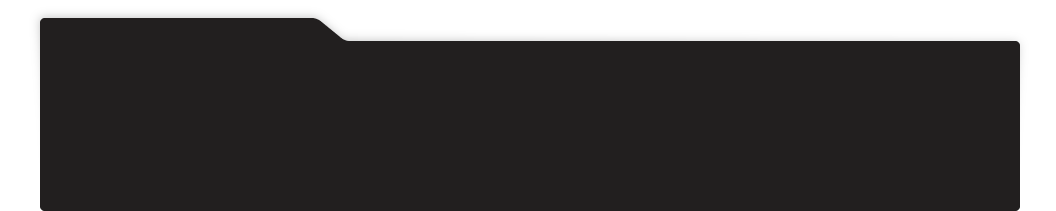
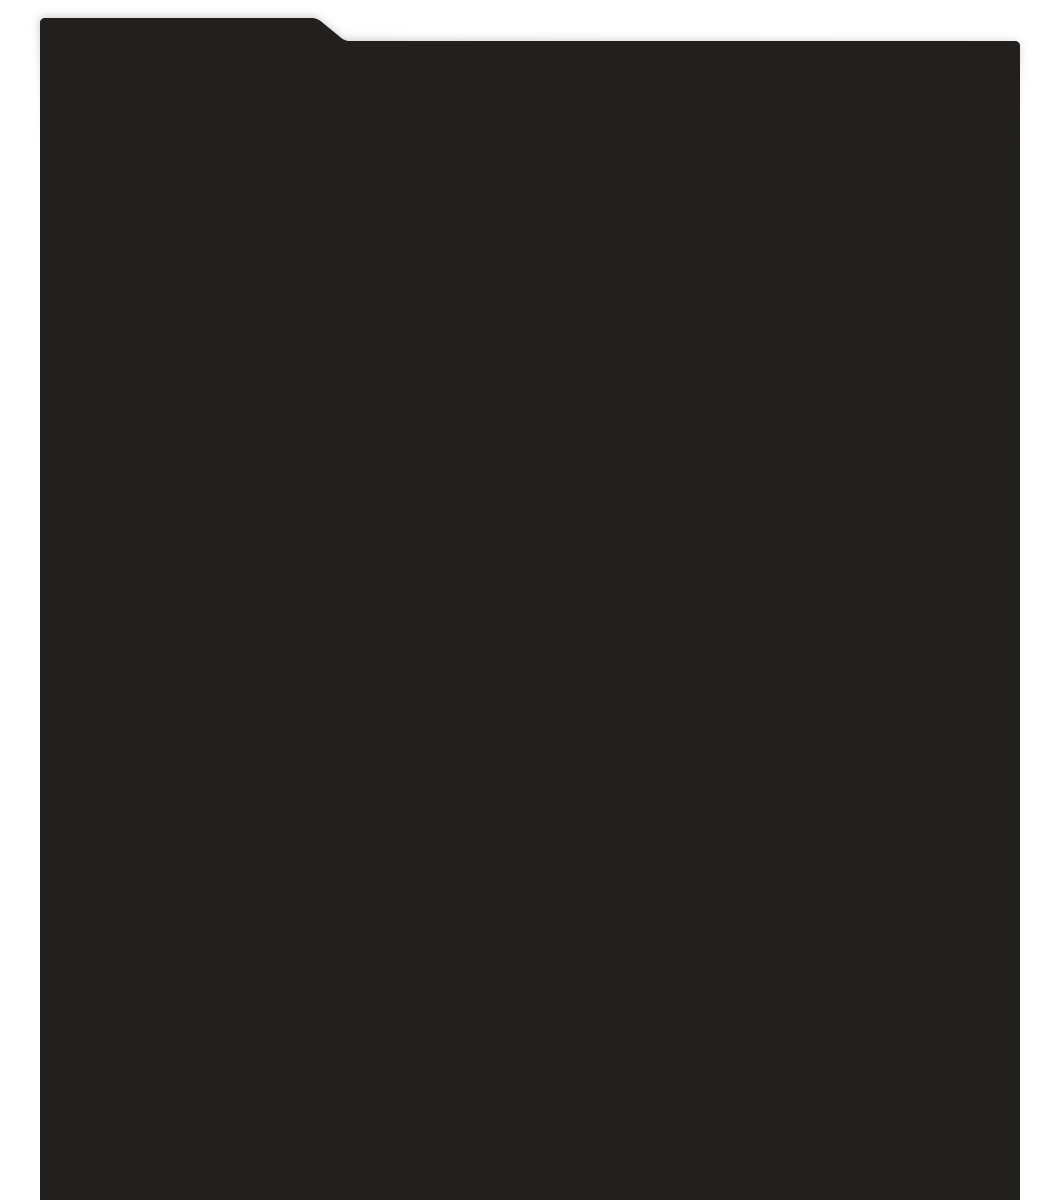
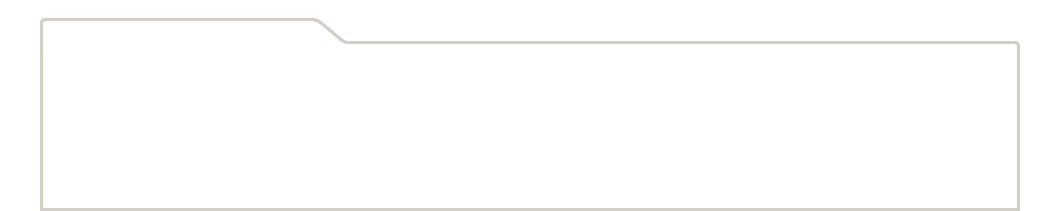
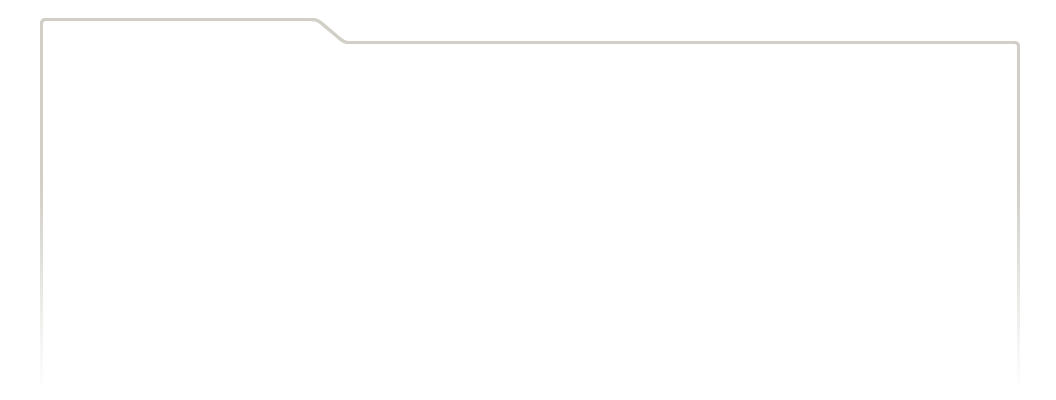
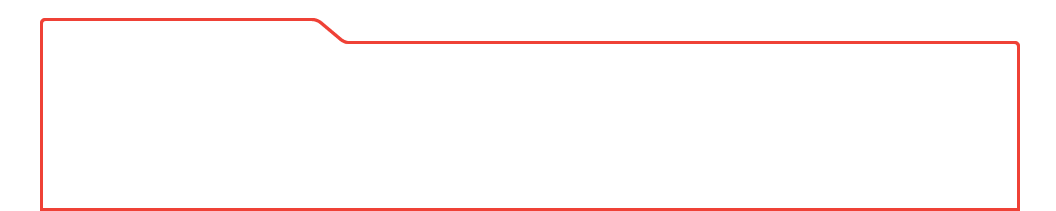
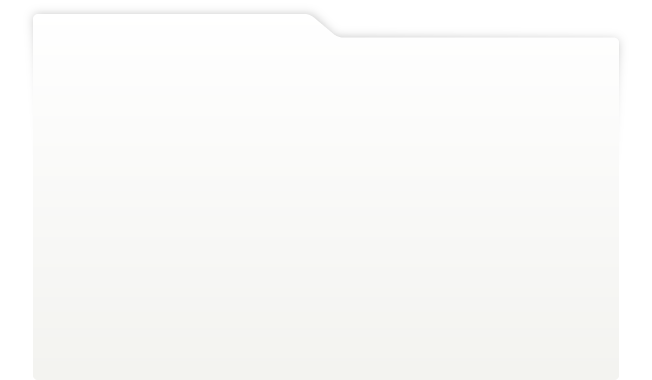
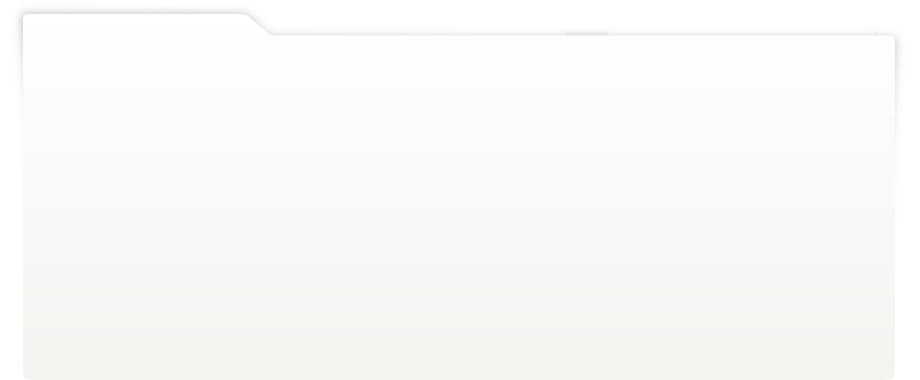
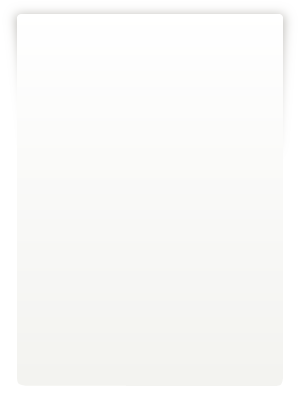
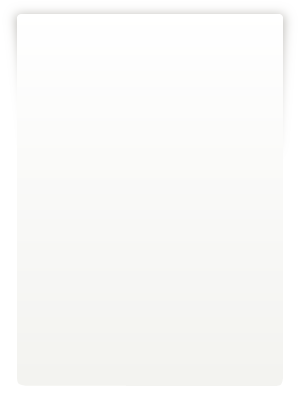
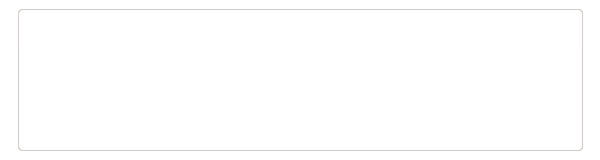
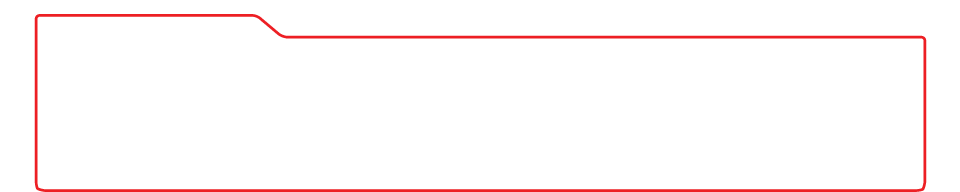
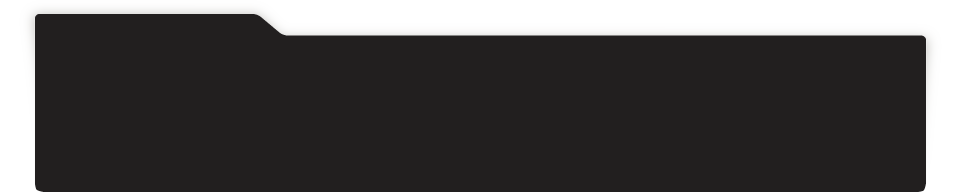
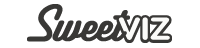
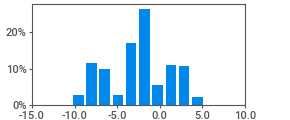
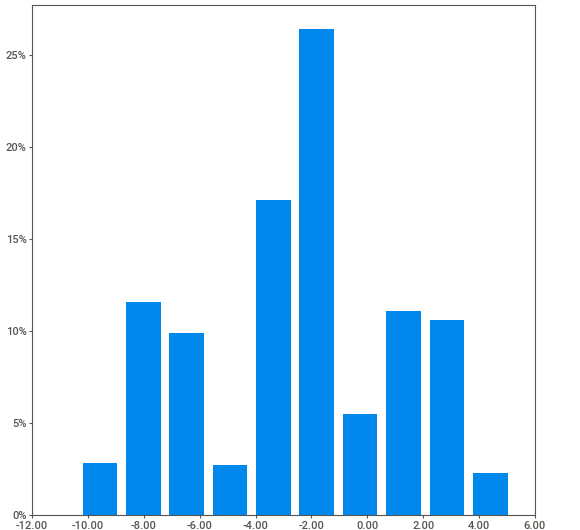
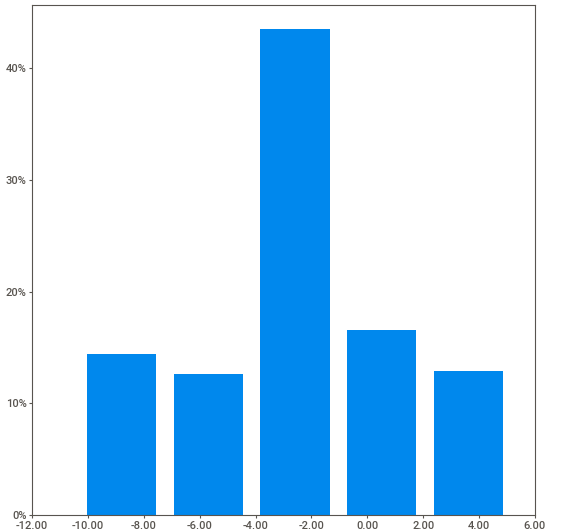
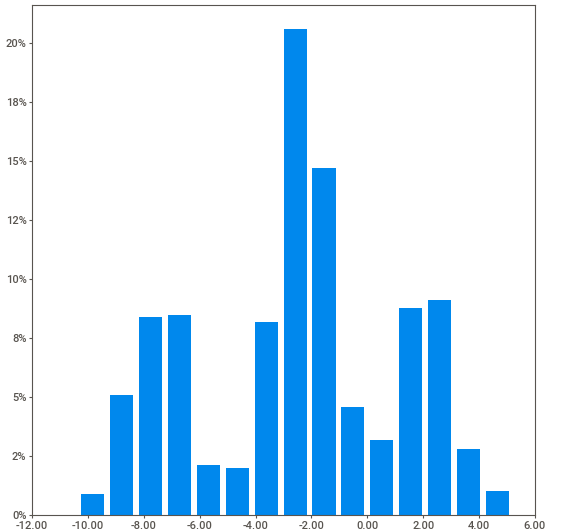
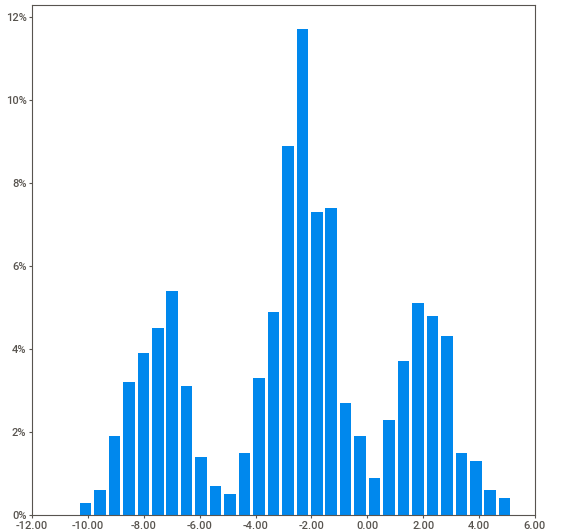
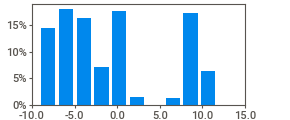
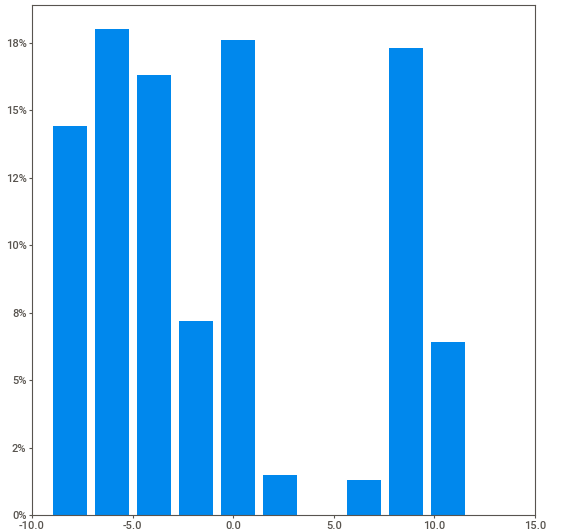
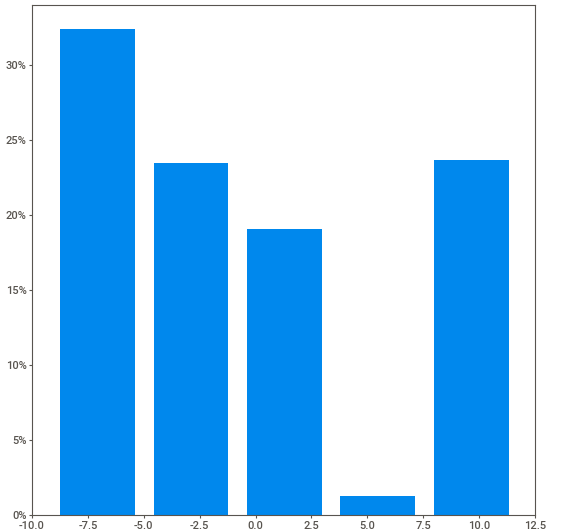
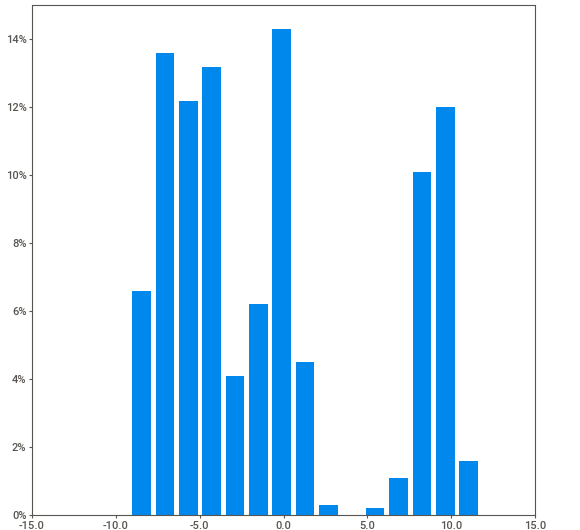
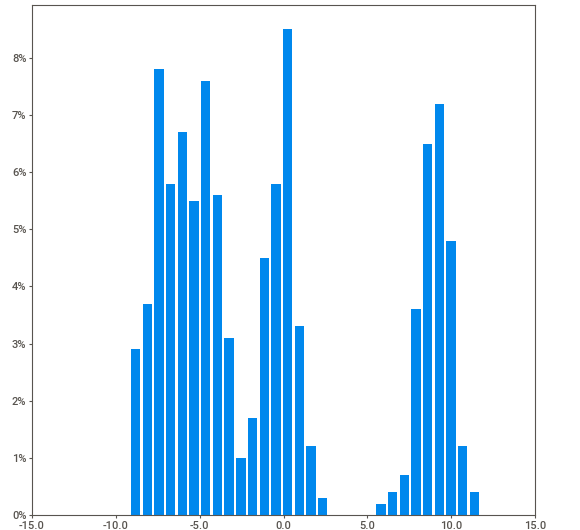
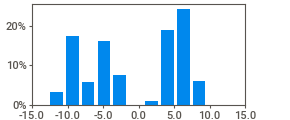
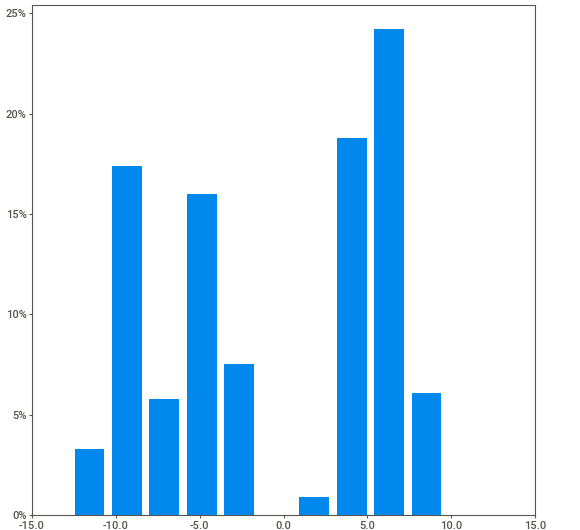
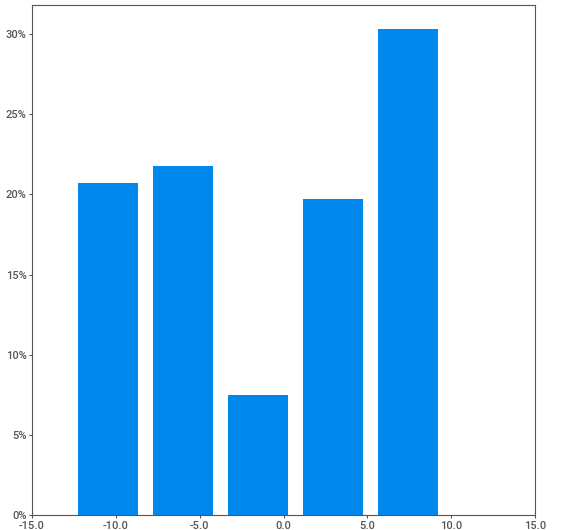
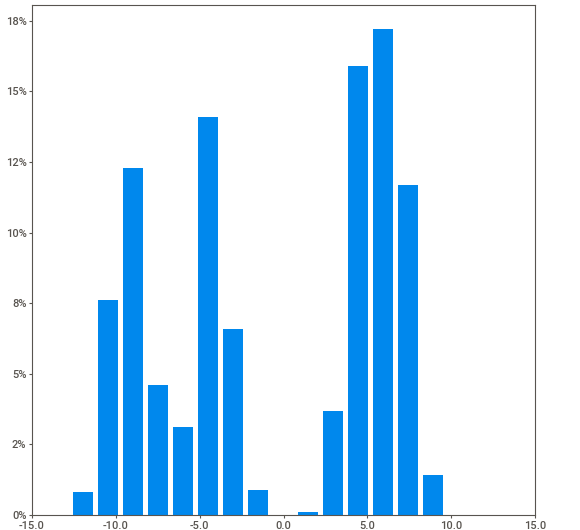
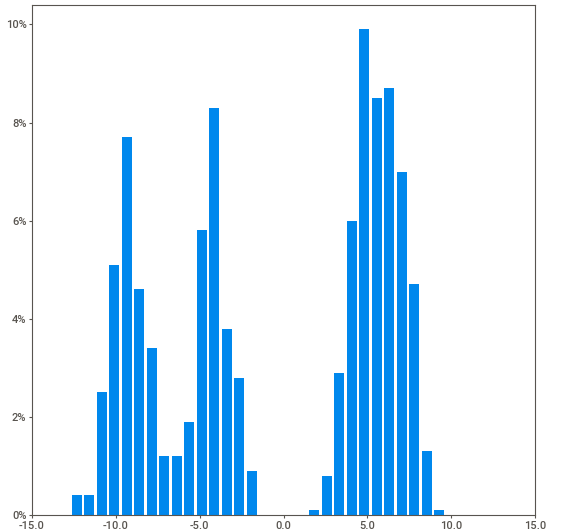
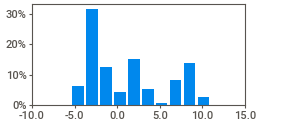
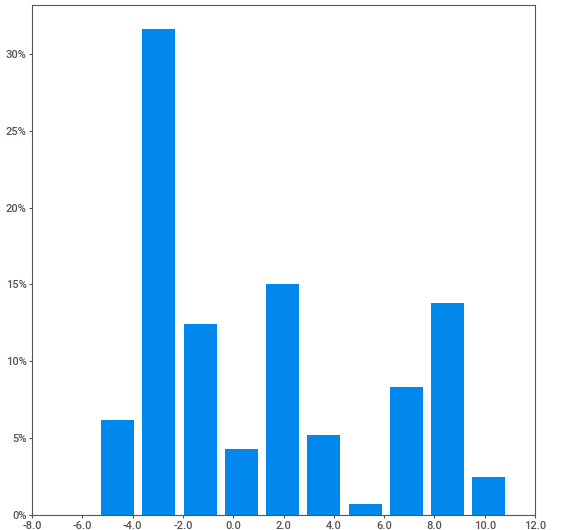
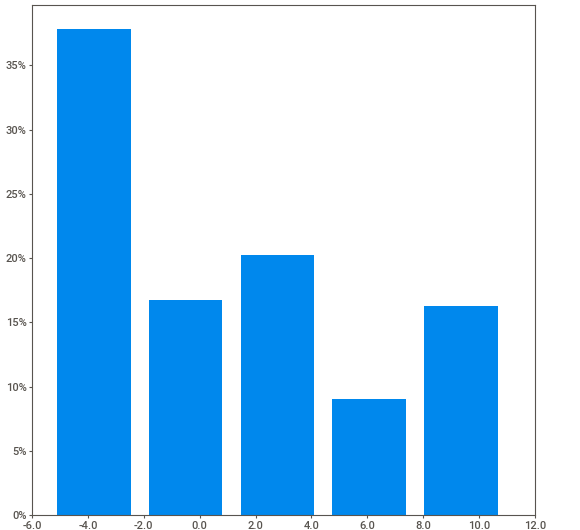
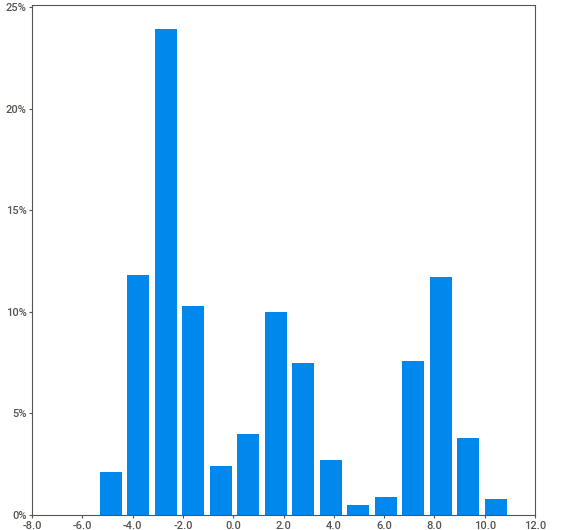
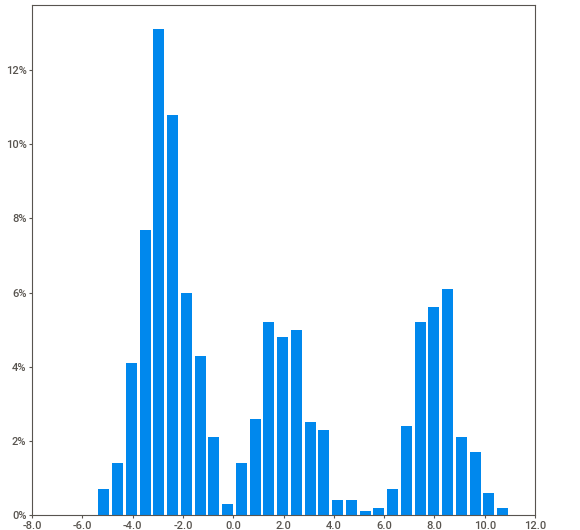
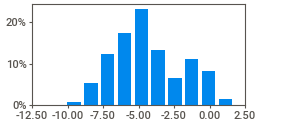
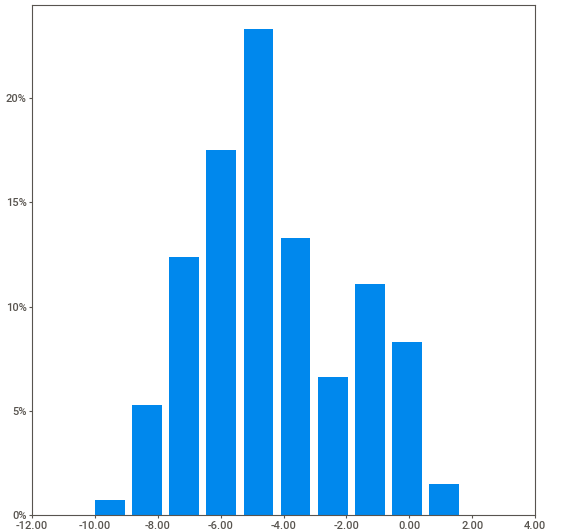
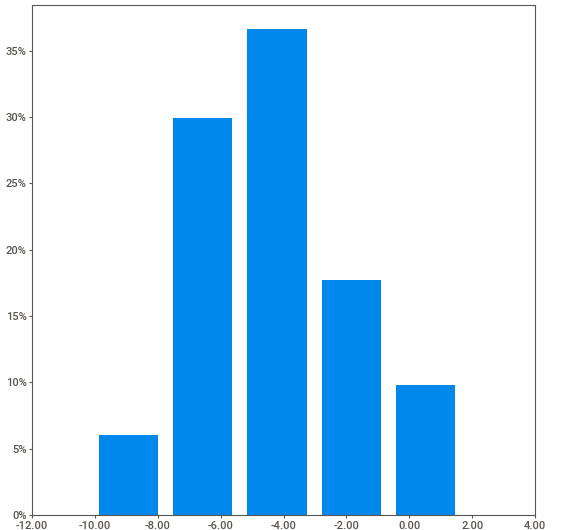
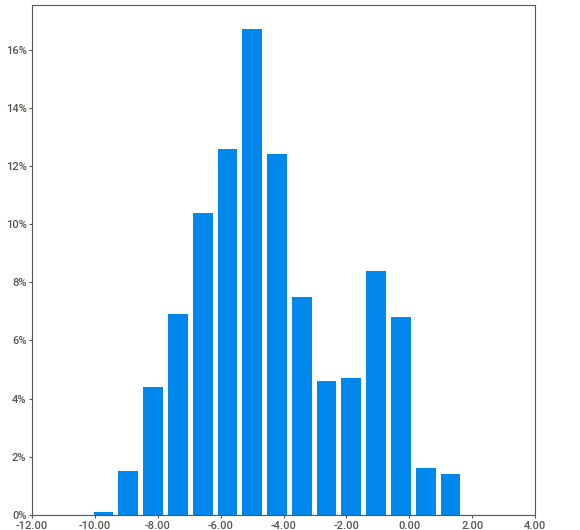
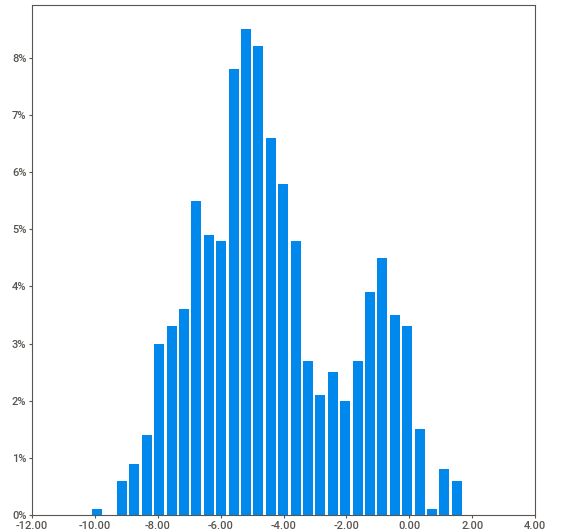
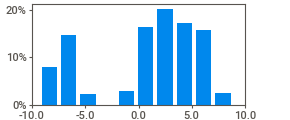
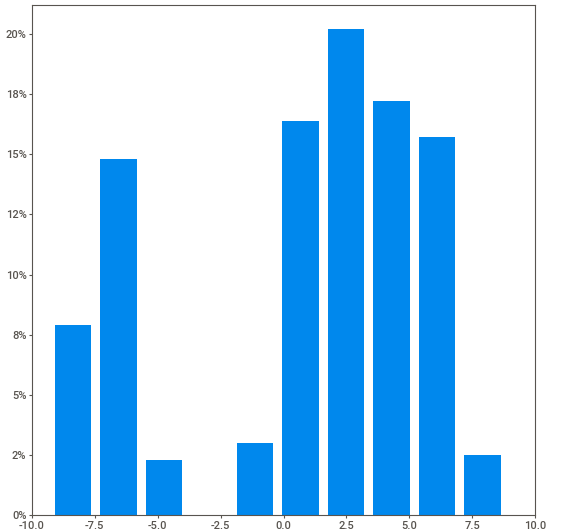
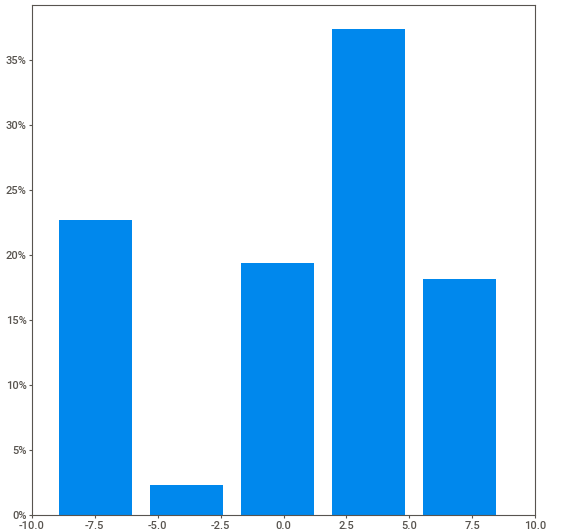
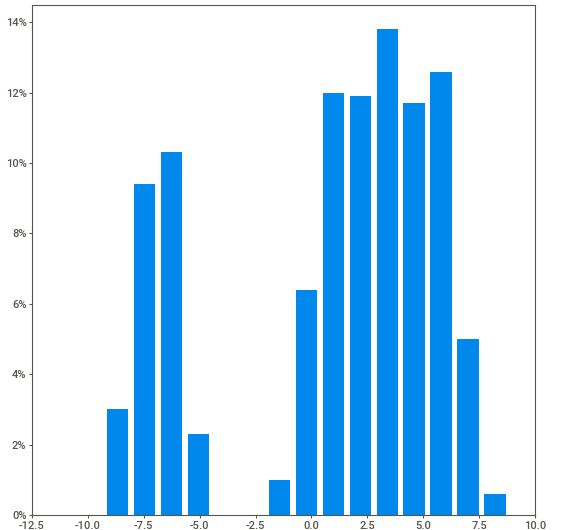
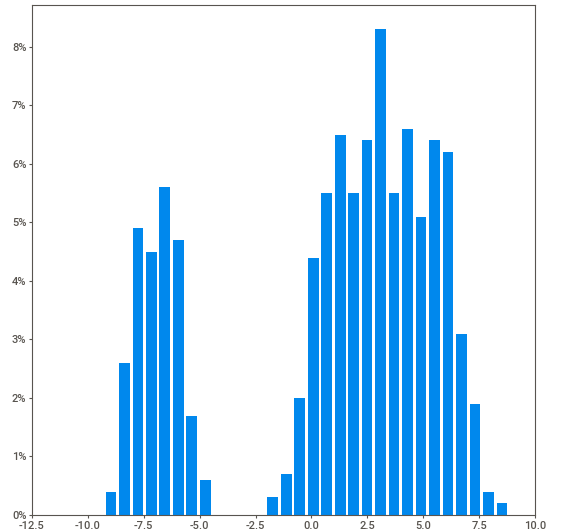
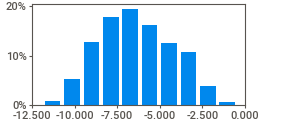
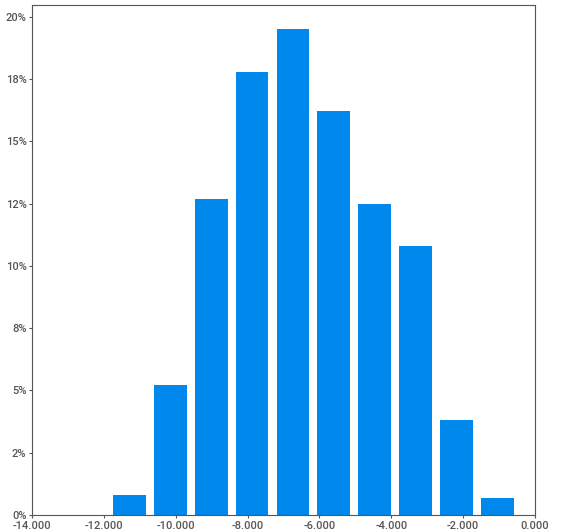
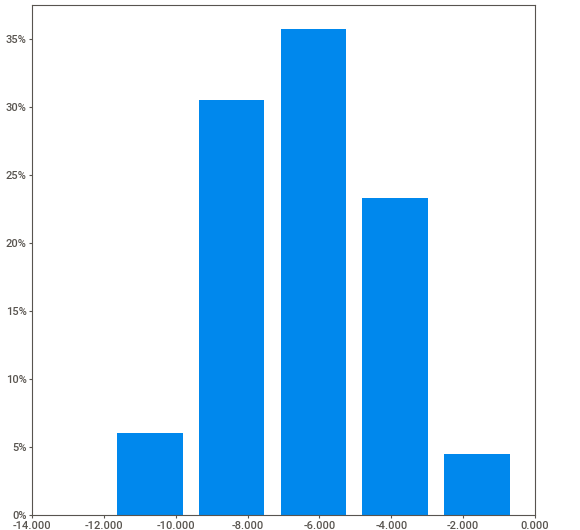
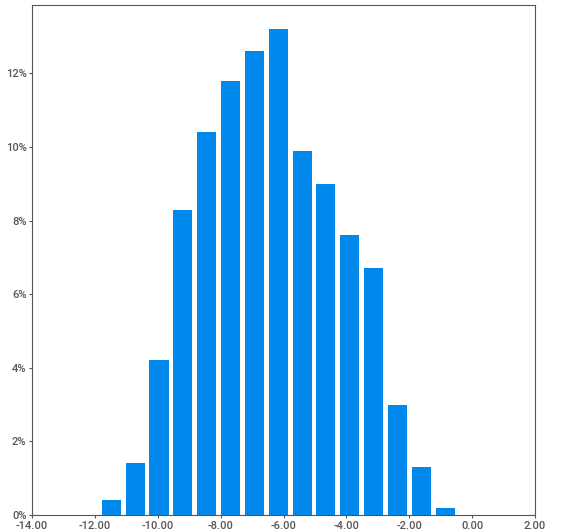
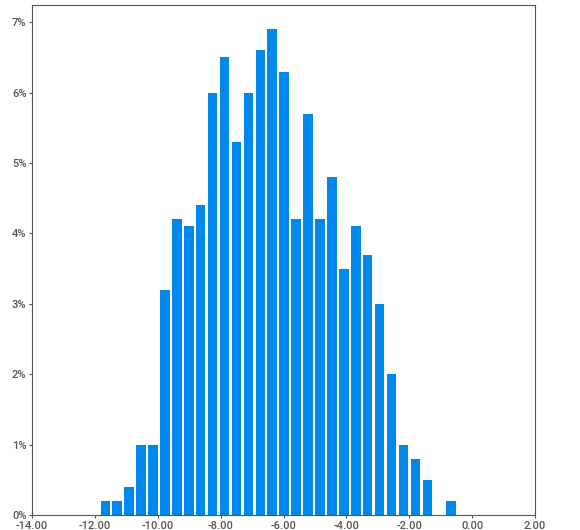
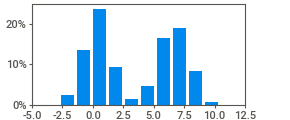
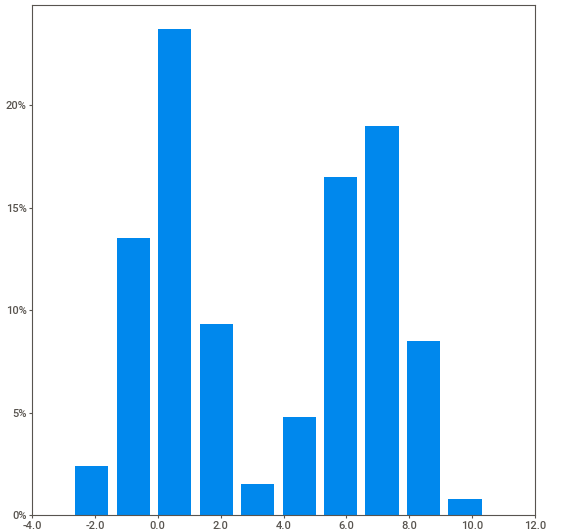
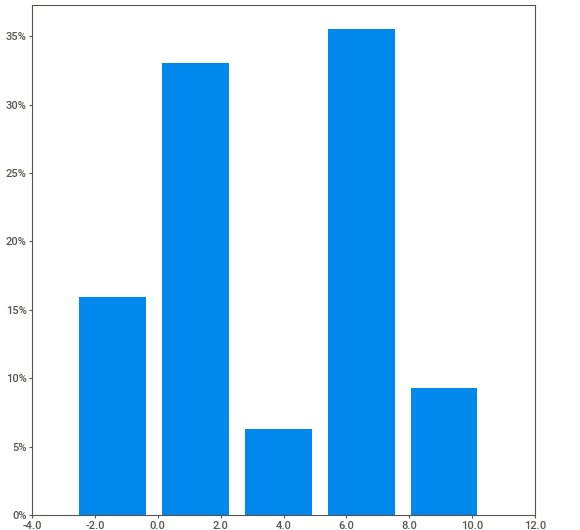
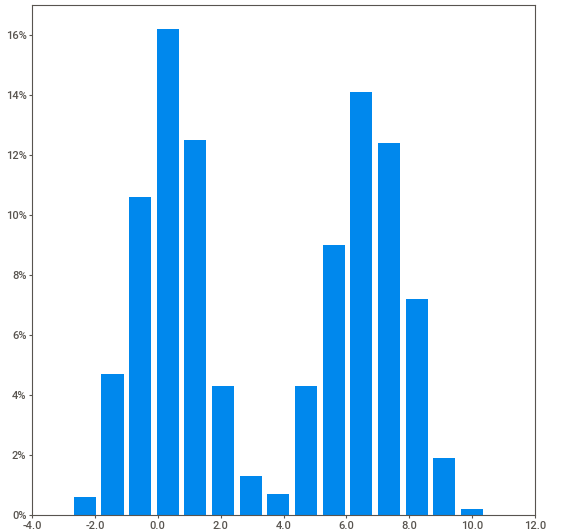
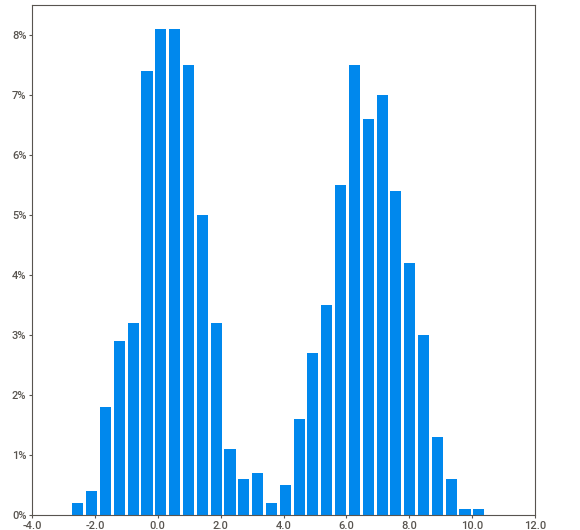
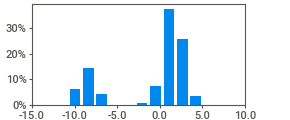
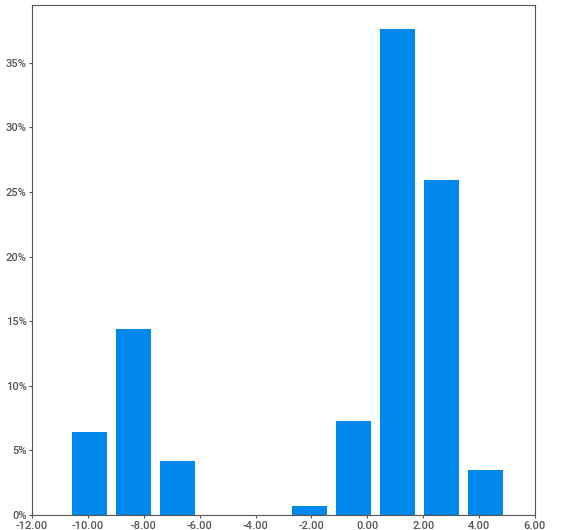
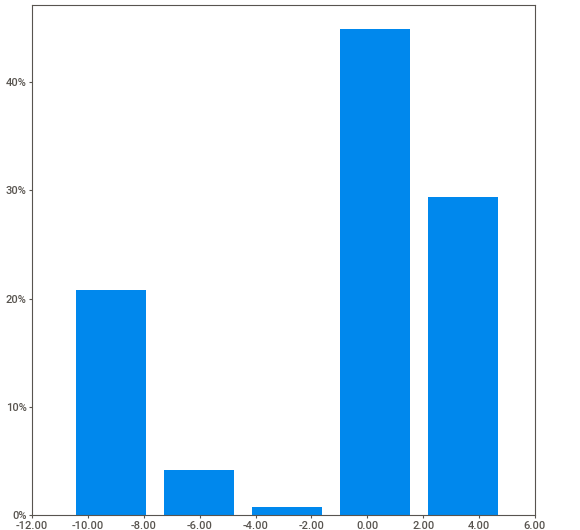
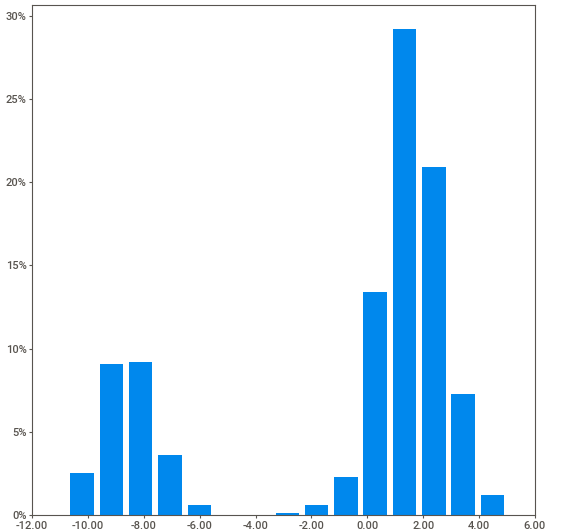
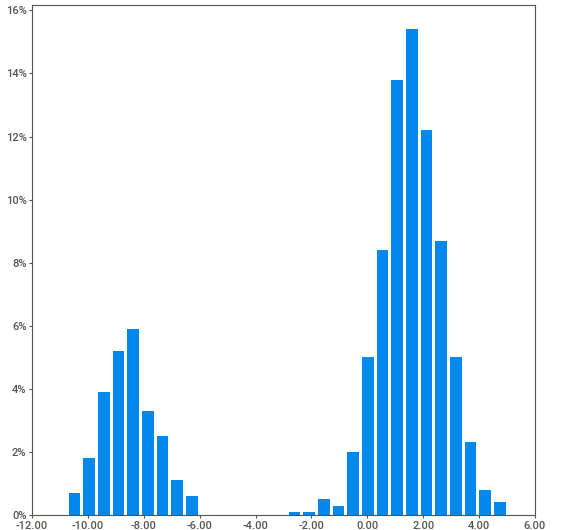
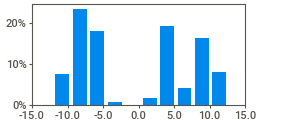
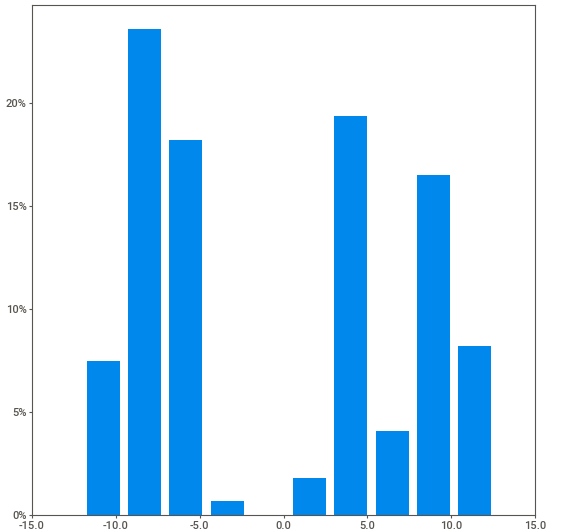
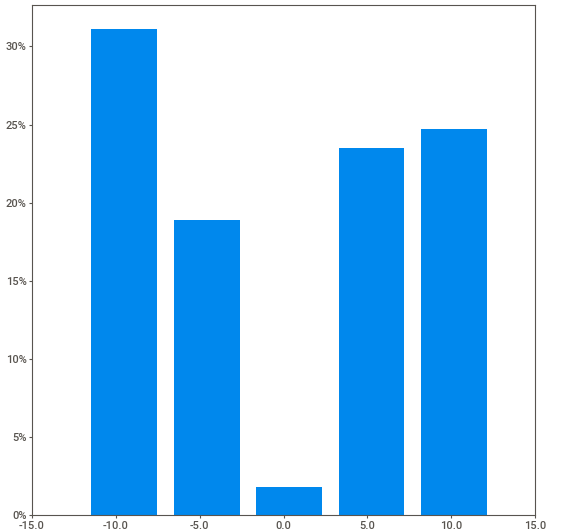
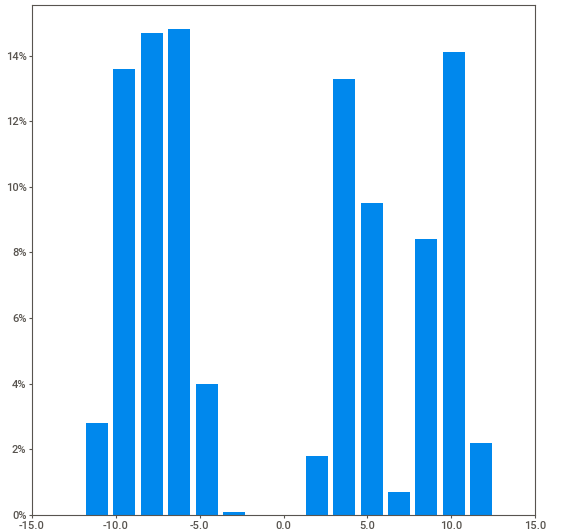
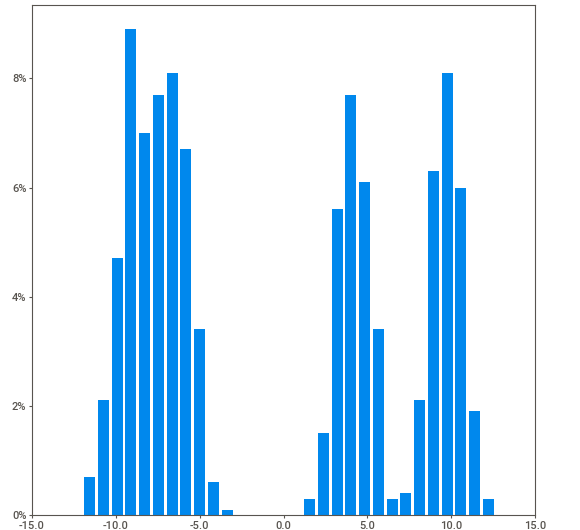
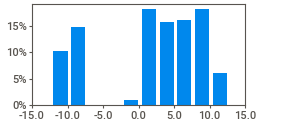
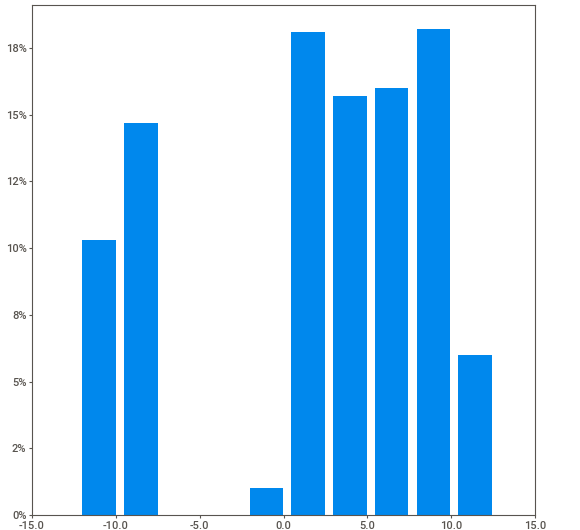
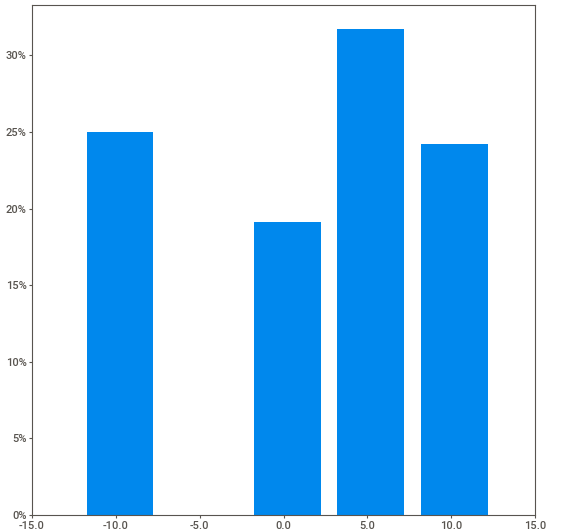
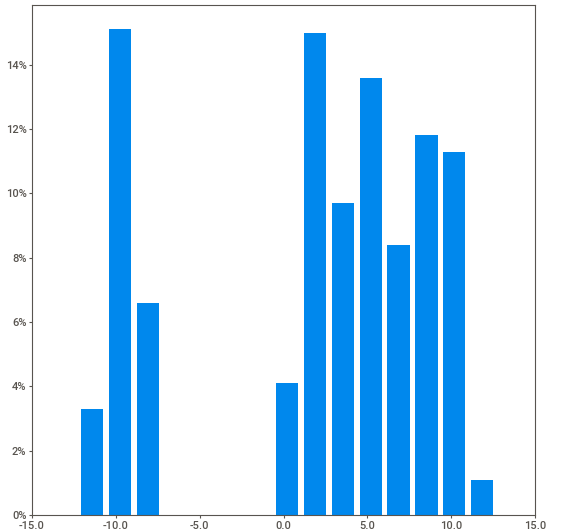
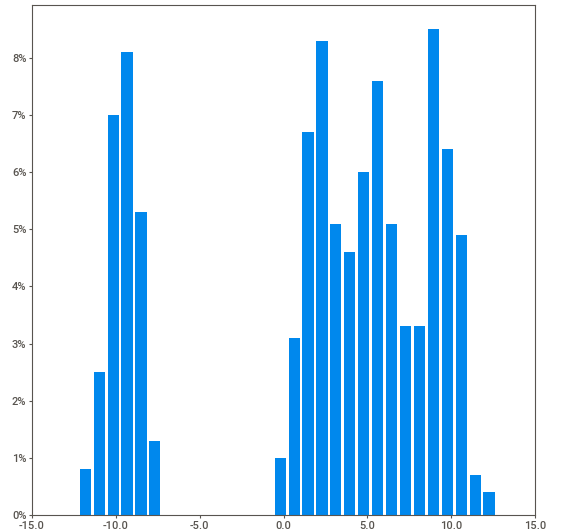
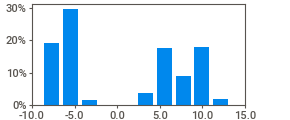
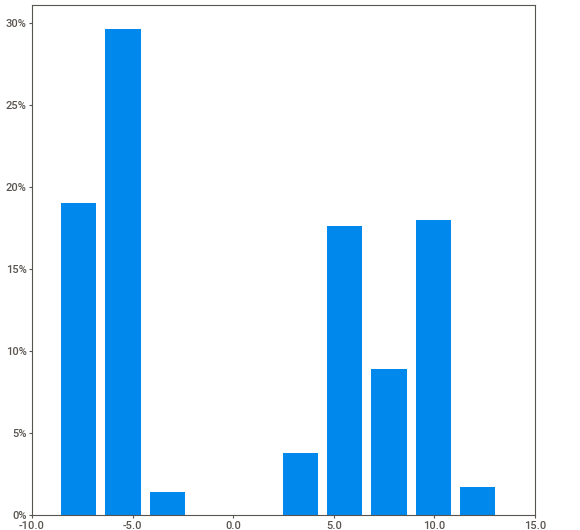
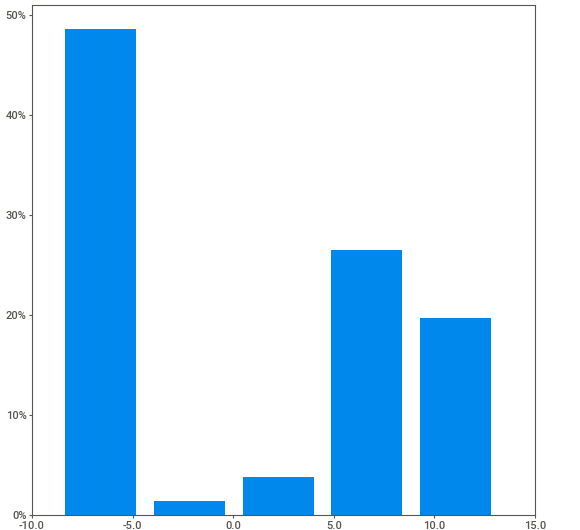
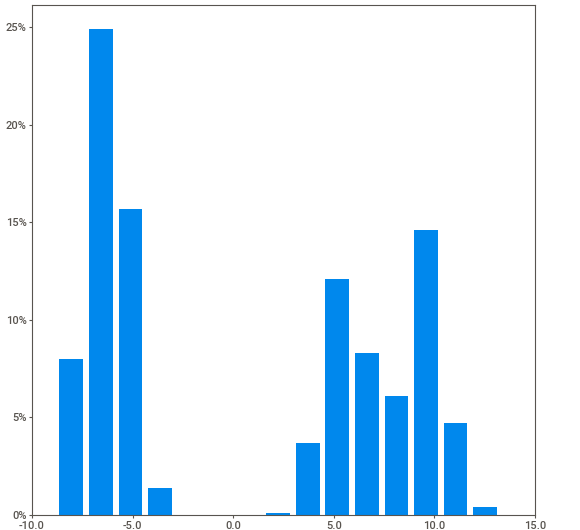
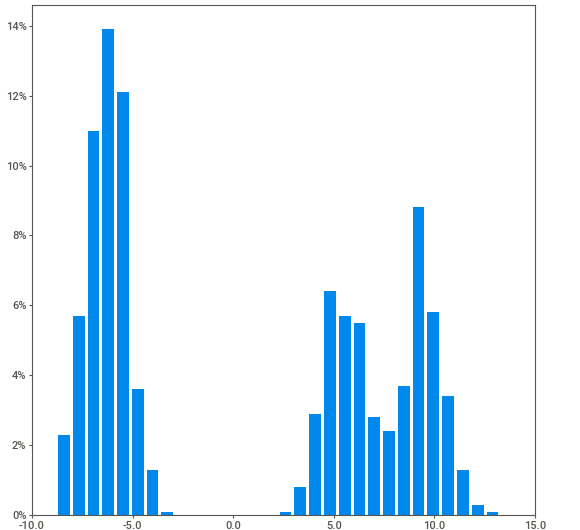
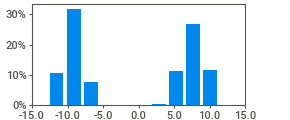
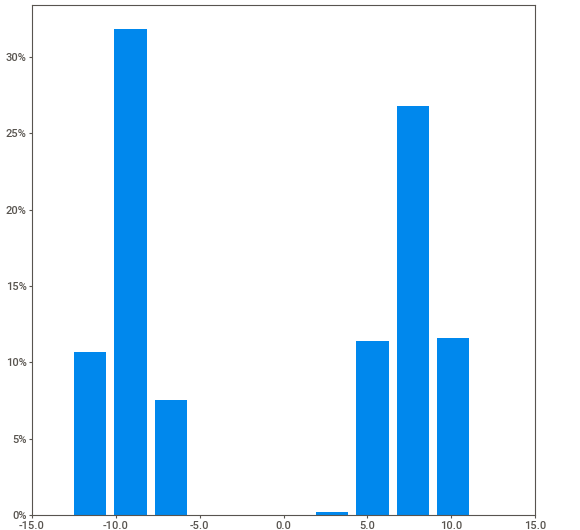
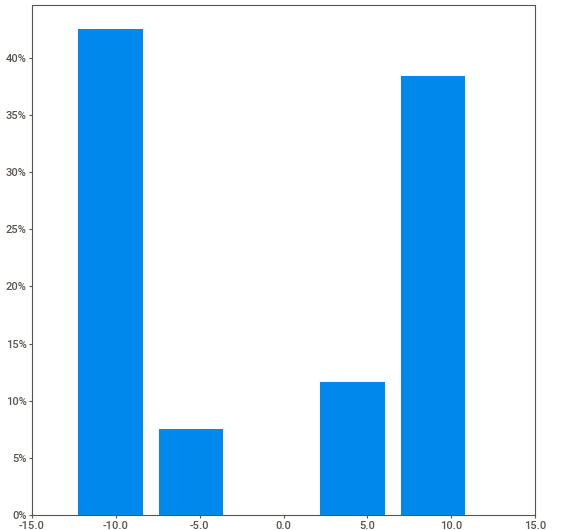
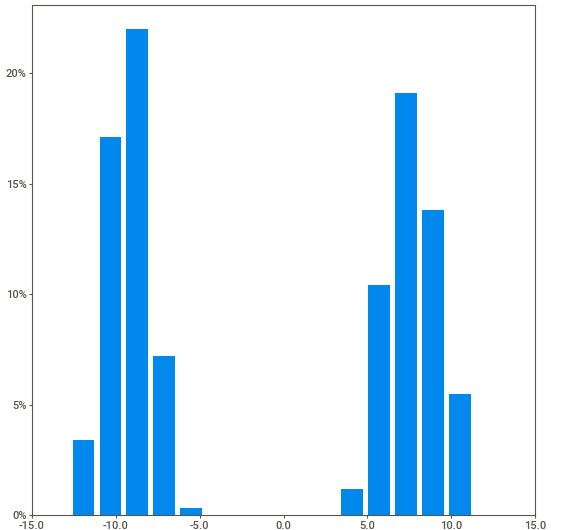
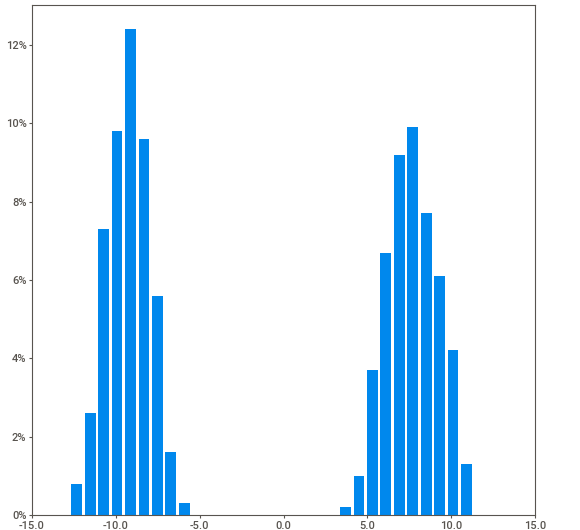
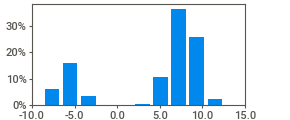
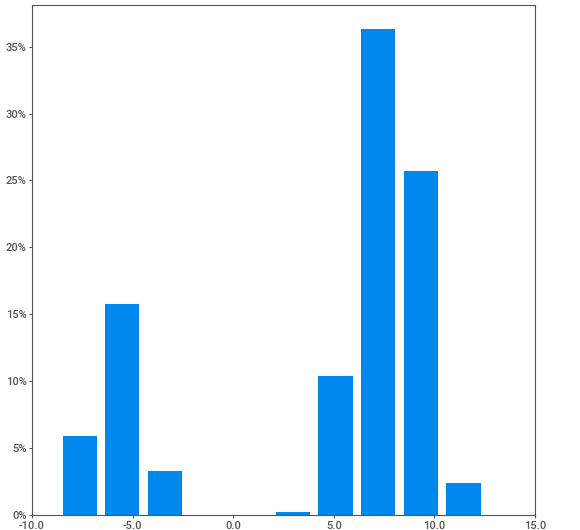
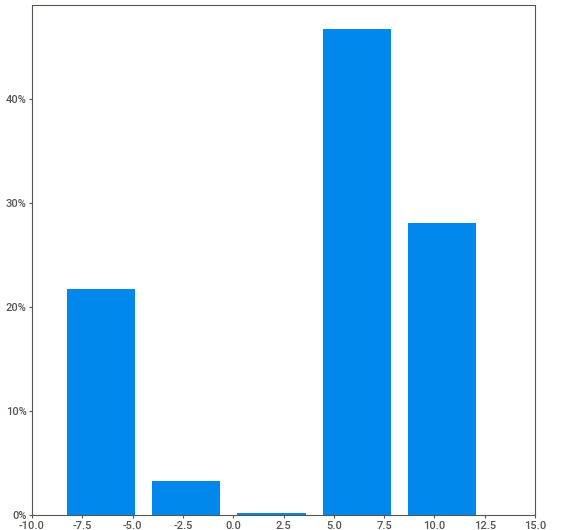
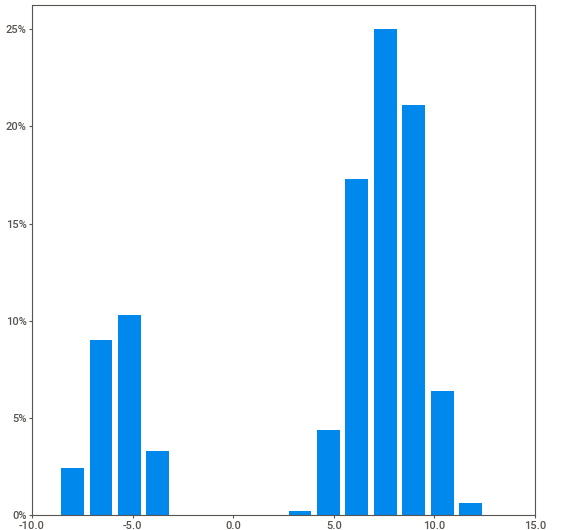
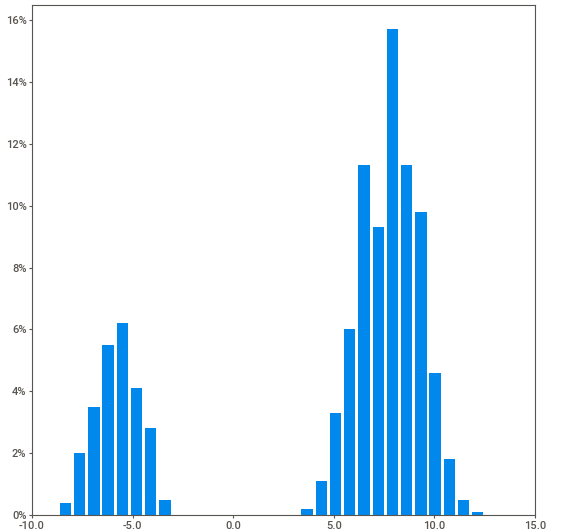
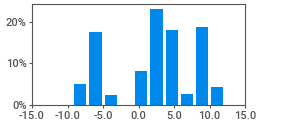
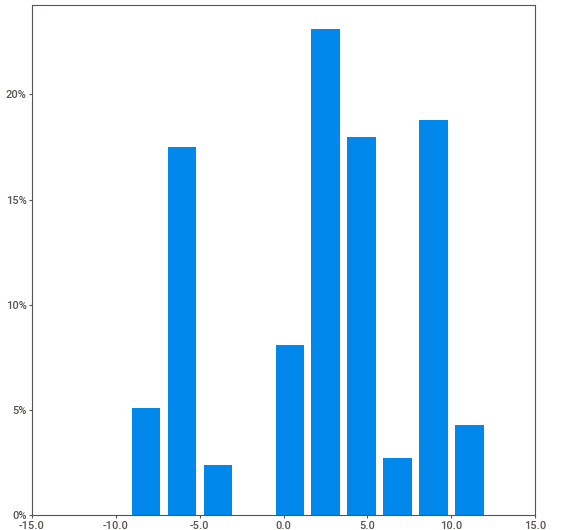
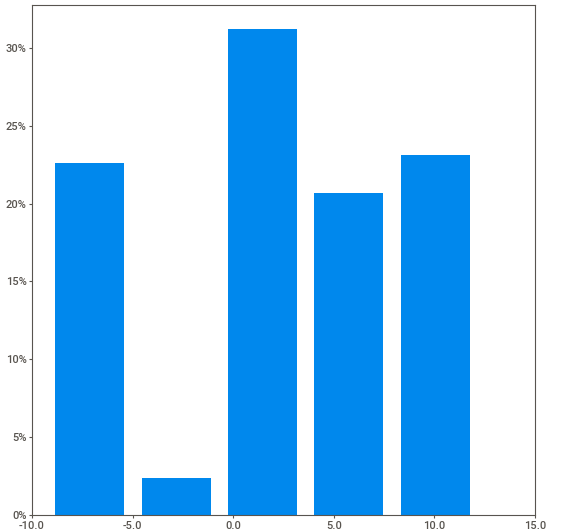
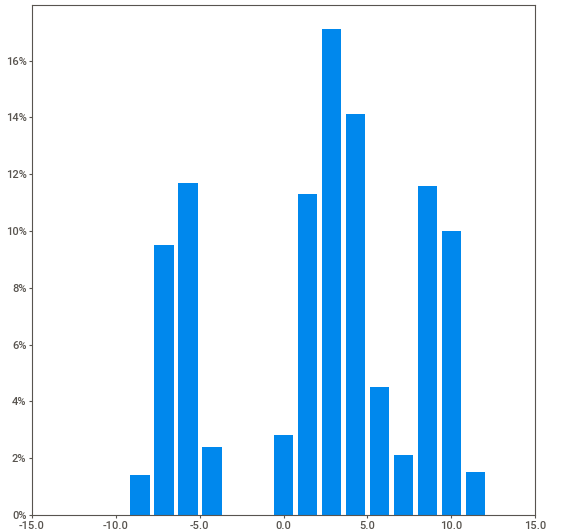
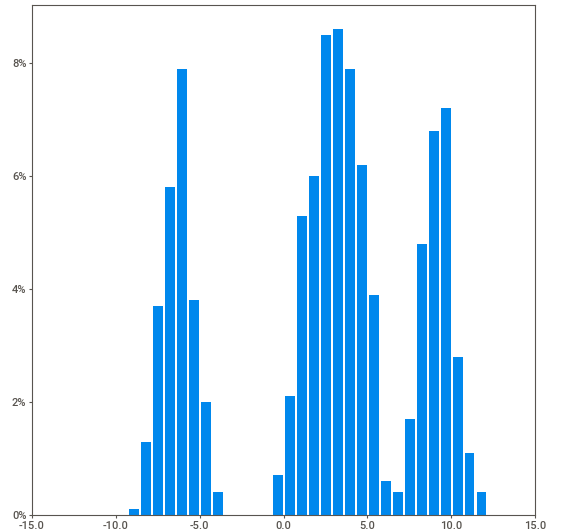
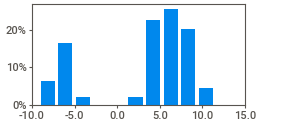
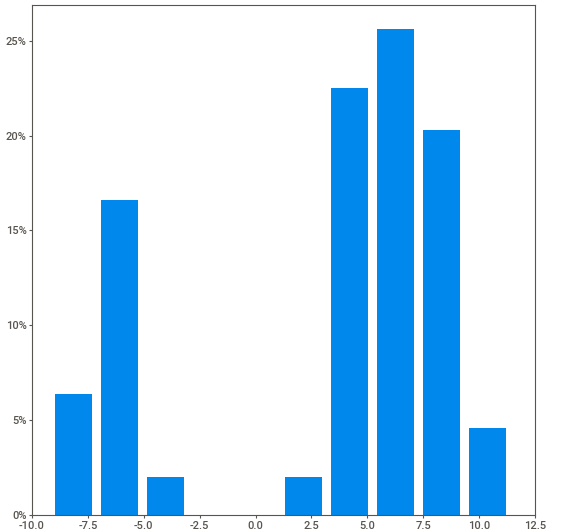
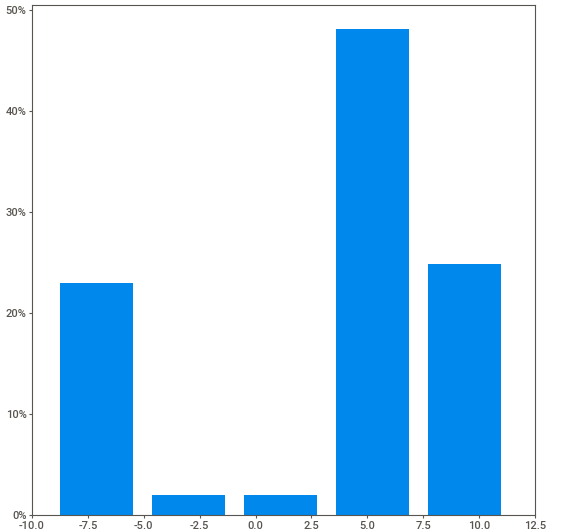
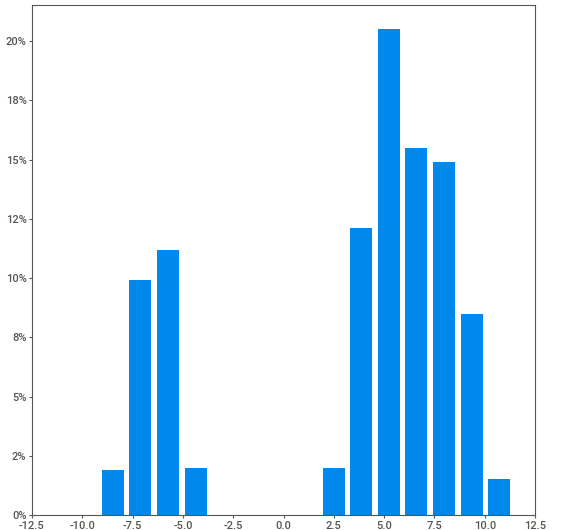
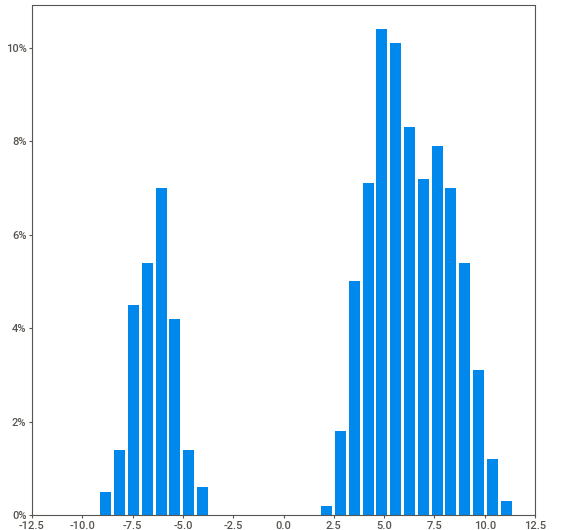
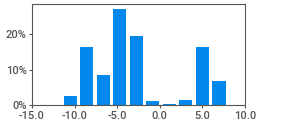
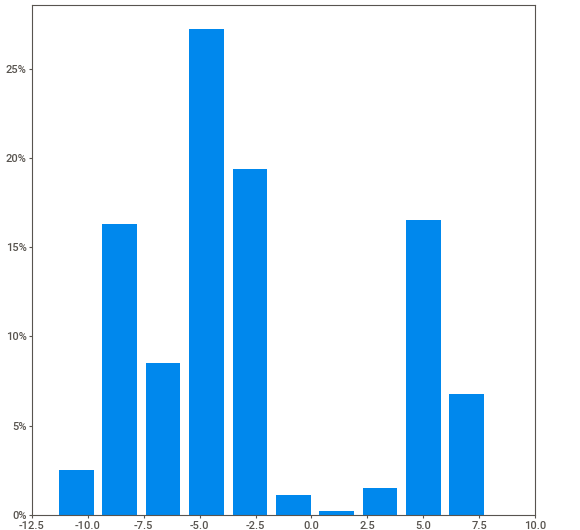
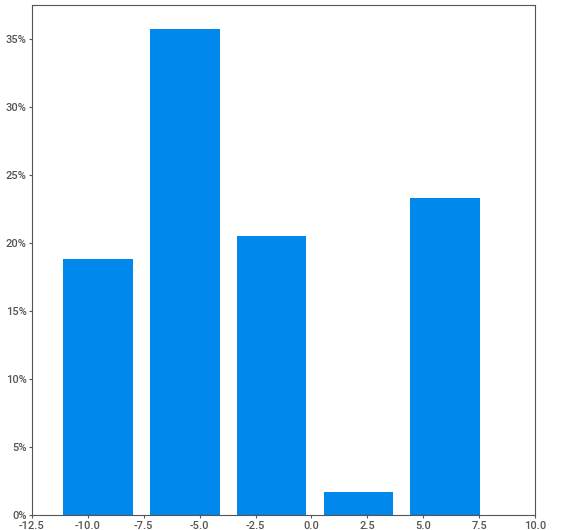
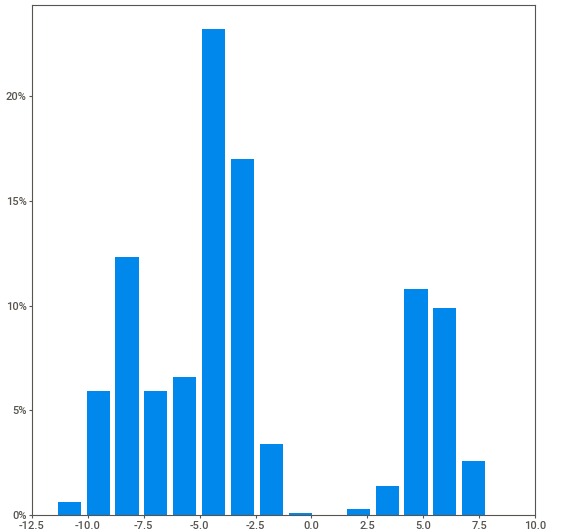
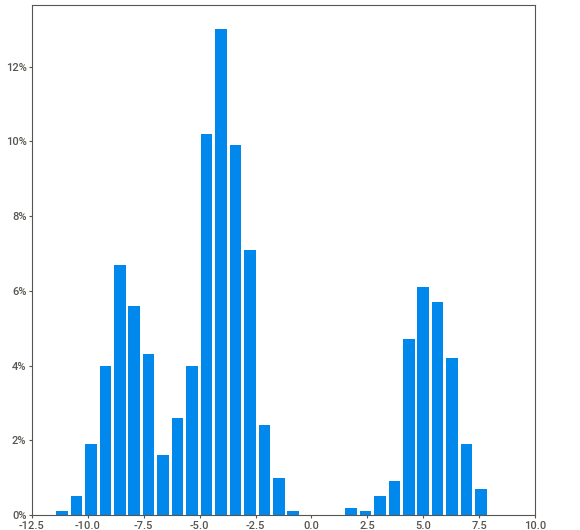
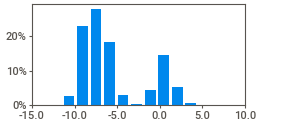
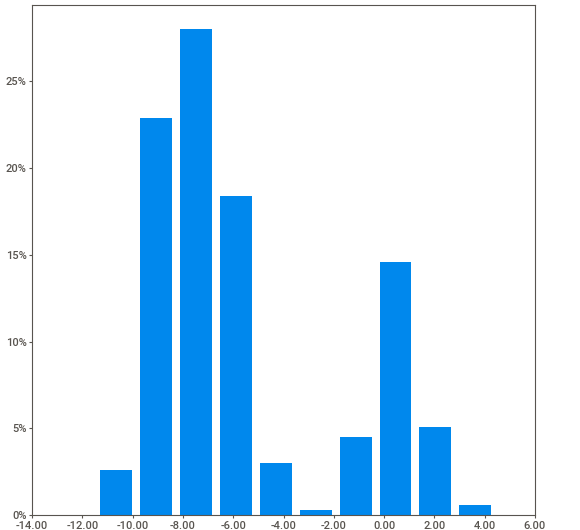
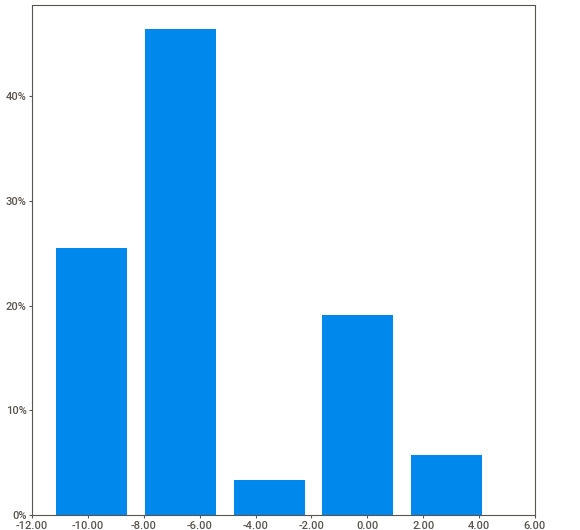
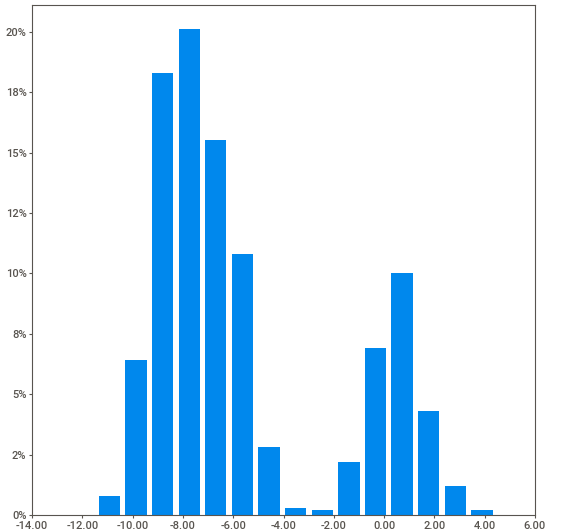
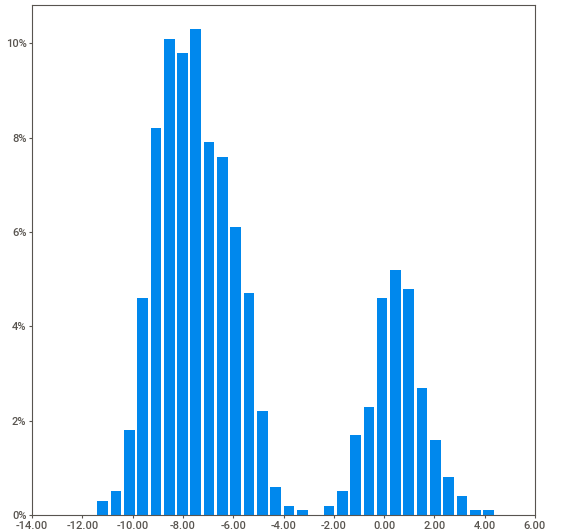
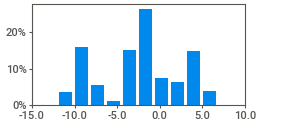
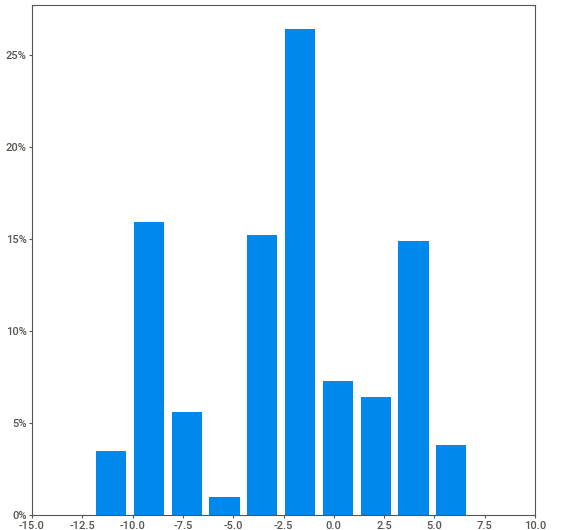
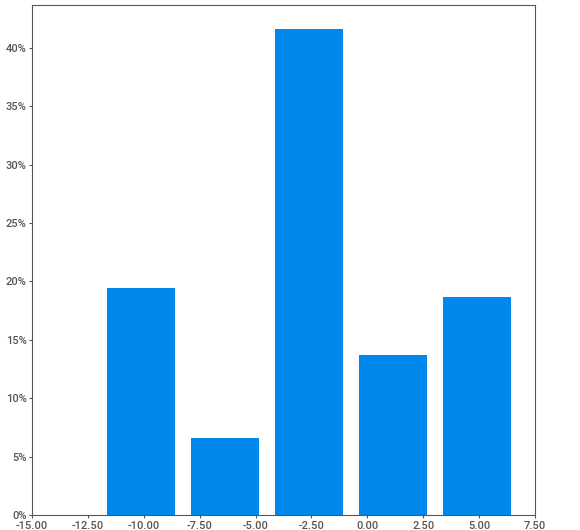
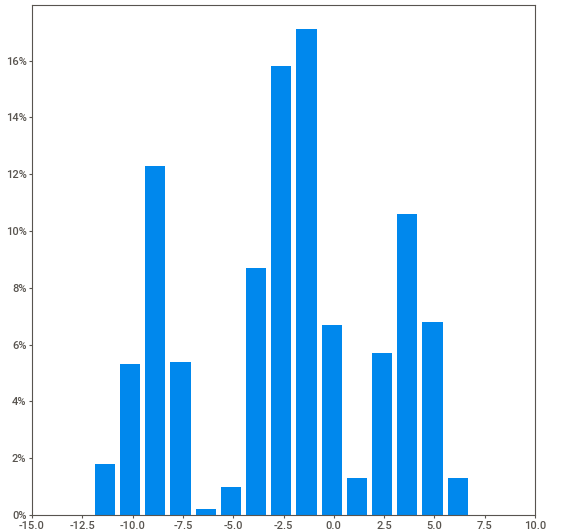
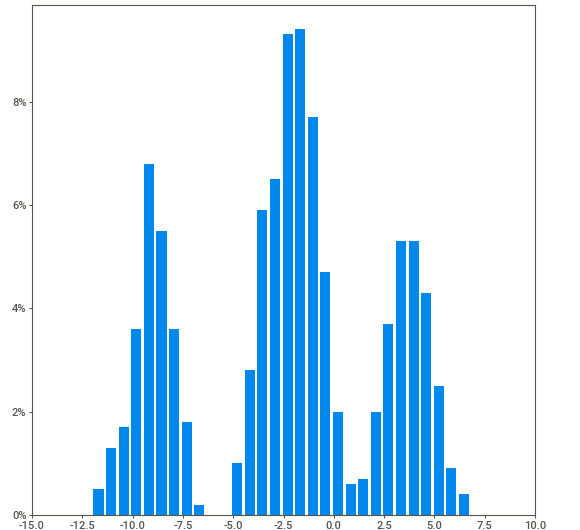
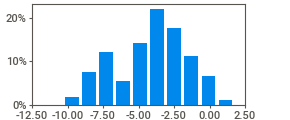
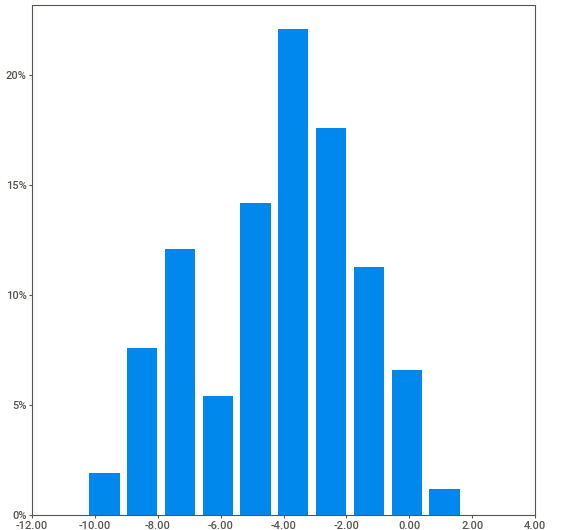
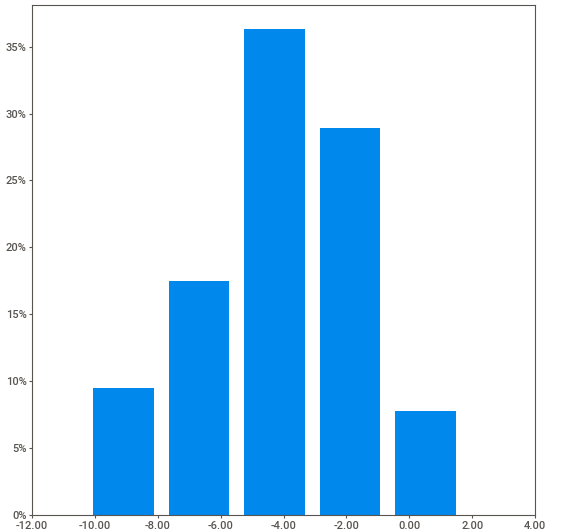
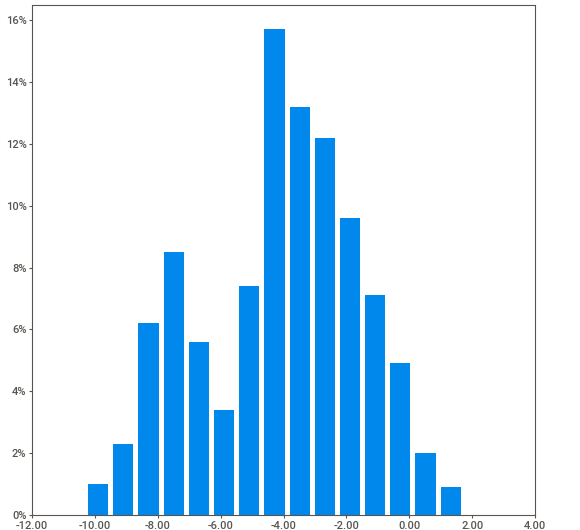
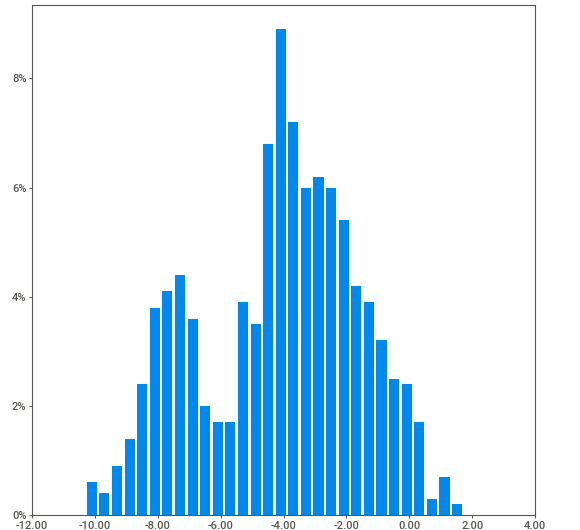

In [10]:
!pip install sweetviz -qq

import sweetviz as sv

my_report = sv.analyze(pd.DataFrame(X),
                       pairwise_analysis="off")

my_report.show_notebook()

## Data visualization: t-SNE

In [13]:
from sklearn.manifold import TSNE

### 2D t-SNE

In [16]:
# Create TSNE object
tsne = TSNE(n_components=2,
            perplexity=5,
            random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

In [18]:
X_tsne

array([[-47.777958 ,  -5.0322676],
       [-25.904749 , -55.35473  ],
       [ 71.41405  , -16.658087 ],
       ...,
       [ -7.316219 ,  66.790215 ],
       [ -5.991822 , -59.7112   ],
       [ 70.01874  , -15.729684 ]], dtype=float32)

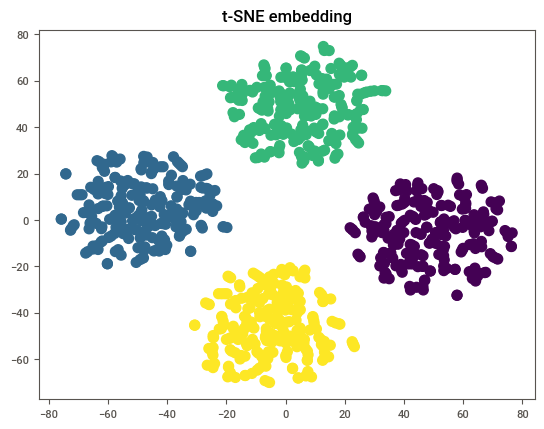

In [20]:
import matplotlib.pyplot as plt

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],  c=y, cmap='viridis', s=50)
plt.title('t-SNE embedding')
plt.show()

### 3D t-SNE

In [23]:
# Create TSNE object
tsne_3d = TSNE(n_components=3, perplexity=5, random_state=42)

# Fit and transform the data
X_tsne_3d = tsne_3d.fit_transform(X)

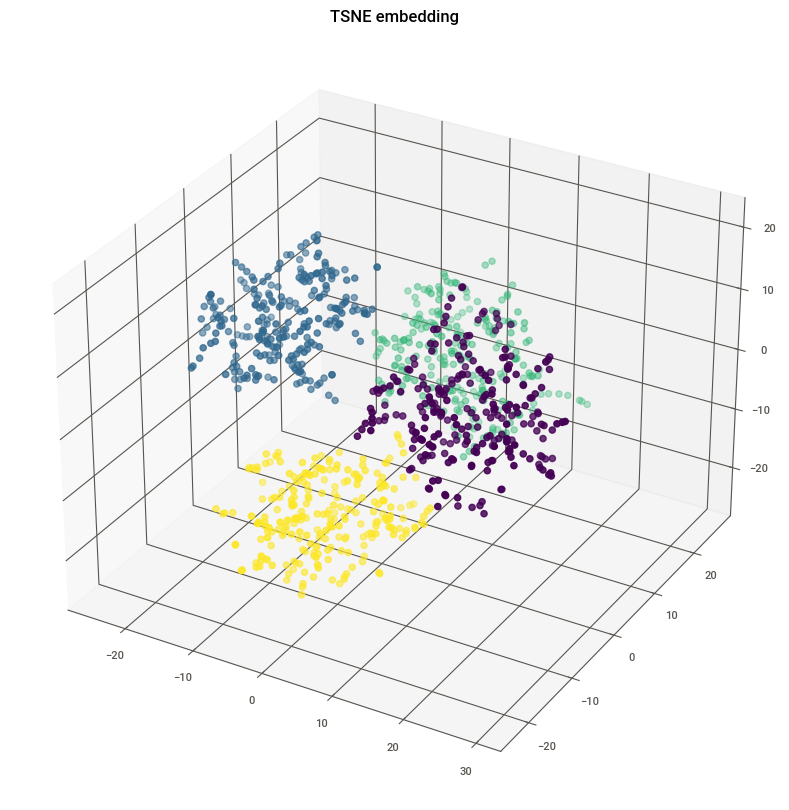

In [25]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(X_tsne_3d[:,0],
             X_tsne_3d[:,1],
             X_tsne_3d[:,2],
              c = y,
             cmap='viridis')

plt.title("TSNE embedding")

# show plot
plt.show()

## Data visualization: PCA

### 2D PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(X)
pca_df

array([[-15.91280635,   1.63714953],
       [ -8.4891891 , -18.68103557],
       [ 28.23406755,  -3.91235328],
       ...,
       [  1.21978456,  21.76014197],
       [ -9.20464058, -17.31768984],
       [ 27.41456597,  -4.99427479]])

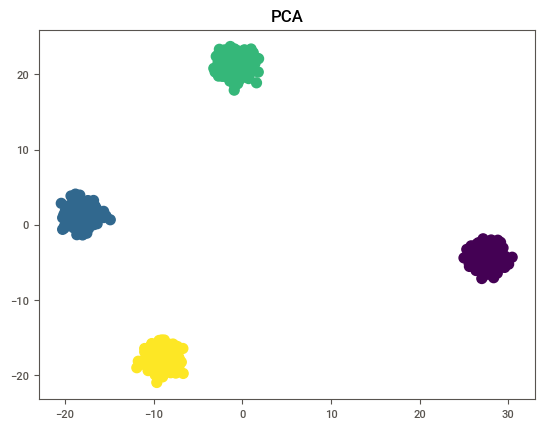

In [31]:
import matplotlib.pyplot as plt
# Plot the results
plt.scatter(pca_df[:, 0],
            pca_df[:, 1],
            c=y,
            cmap='viridis',
            s=50)
plt.title('PCA')
plt.show()

### 3D PCA

In [34]:
# perform PCA
pca = PCA(n_components=3) #We can generate more than 2 components (up to the #variables in our dataset)
pca_df3 = pca.fit_transform(X)
pca_df3 #Transformed dataset

array([[-15.91280635,   1.63714953,  12.51045445],
       [ -8.4891891 , -18.68103557,  -8.86721326],
       [ 28.23406755,  -3.91235328,   3.96392433],
       ...,
       [  1.21978456,  21.76014197,  -7.56798707],
       [ -9.20464058, -17.31768984,  -7.74120007],
       [ 27.41456597,  -4.99427479,   3.38330276]])

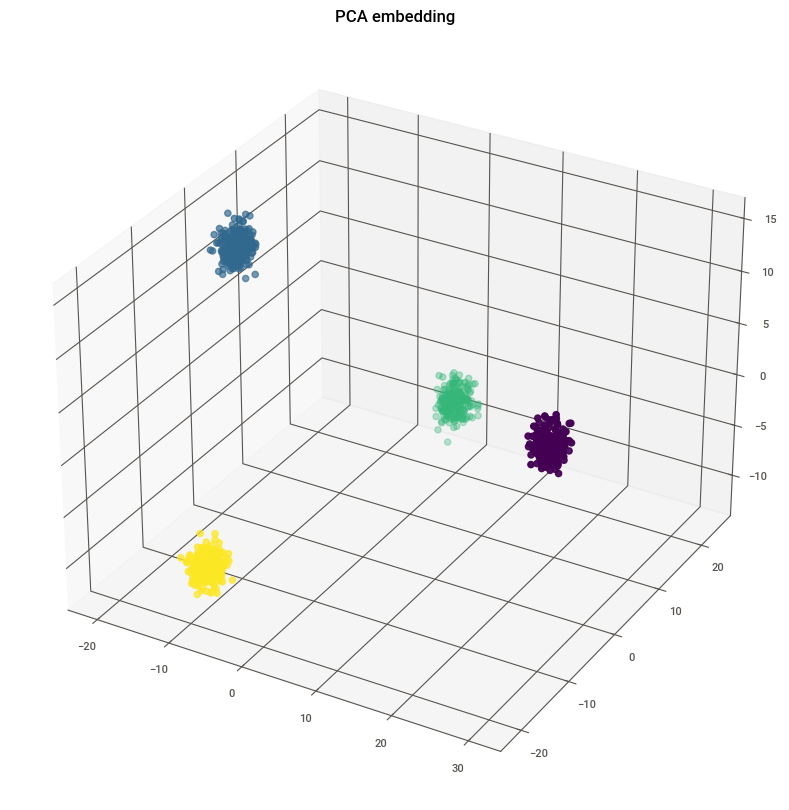

In [36]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(pca_df3[:,0],
             pca_df3[:,1],
             pca_df3[:,2],
              c = y,
             cmap='viridis')

plt.title("PCA embedding")

# show plot
plt.show()

## Clustering: k-means

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [41]:
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # we fill 0

X_scaled

array([[ 1.34118207, -0.89000305, -0.62433017, ..., -0.55143268,
         1.25086138,  0.8012087 ],
       [ 0.46446826, -0.58841922,  0.93287403, ..., -0.58412583,
         0.0903357 , -0.90958912],
       [ 0.13975422,  1.63188101,  0.79713791, ...,  1.80050469,
         0.15926617,  0.55983522],
       ...,
       [-1.56495716,  0.06727557, -1.51093329, ...,  0.15043941,
        -1.52700836,  0.18593477],
       [-0.01557419, -0.74851468,  0.96828674, ..., -0.81914857,
        -0.50500609, -0.80773159],
       [-0.12518461,  1.58735525,  0.94869664, ...,  1.47402174,
        -0.00930461,  0.26371554]])

In [43]:
scaler_fitted = scaler.fit(X) # we fill 0
data_transformed = scaler_fitted.transform(X)

In [45]:
data_transformed

array([[ 1.34118207, -0.89000305, -0.62433017, ..., -0.55143268,
         1.25086138,  0.8012087 ],
       [ 0.46446826, -0.58841922,  0.93287403, ..., -0.58412583,
         0.0903357 , -0.90958912],
       [ 0.13975422,  1.63188101,  0.79713791, ...,  1.80050469,
         0.15926617,  0.55983522],
       ...,
       [-1.56495716,  0.06727557, -1.51093329, ...,  0.15043941,
        -1.52700836,  0.18593477],
       [-0.01557419, -0.74851468,  0.96828674, ..., -0.81914857,
        -0.50500609, -0.80773159],
       [-0.12518461,  1.58735525,  0.94869664, ...,  1.47402174,
        -0.00930461,  0.26371554]])

In [47]:
scaler_fitted.mean_

array([-2.50858652, -0.69927104, -0.53154257,  1.16961824, -4.32171078,
        0.75907866, -6.39494271,  3.52763889, -0.93380106, -0.37994578,
        1.84575286,  0.60490768, -0.77719767,  4.39723177,  2.25688574,
        3.15107375, -2.69028845, -5.53137242, -2.33870654, -4.13045067])

In [49]:
scaler.mean_, scaler.var_

(array([-2.50858652, -0.69927104, -0.53154257,  1.16961824, -4.32171078,
         0.75907866, -6.39494271,  3.52763889, -0.93380106, -0.37994578,
         1.84575286,  0.60490768, -0.77719767,  4.39723177,  2.25688574,
         3.15107375, -2.69028845, -5.53137242, -2.33870654, -4.13045067]),
 array([12.75263764, 38.95765415, 43.33288035, 20.67131314,  5.78453555,
        23.26006452,  4.60543469, 11.24318168, 20.3116175 , 59.66858361,
        51.00889577, 50.70709567, 73.75614175, 36.41755574, 32.27621393,
        33.29622809, 25.8662993 , 14.04655477, 21.98327527,  6.32799765]))

In [51]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_scaled)

In [53]:
labels

array([0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2,

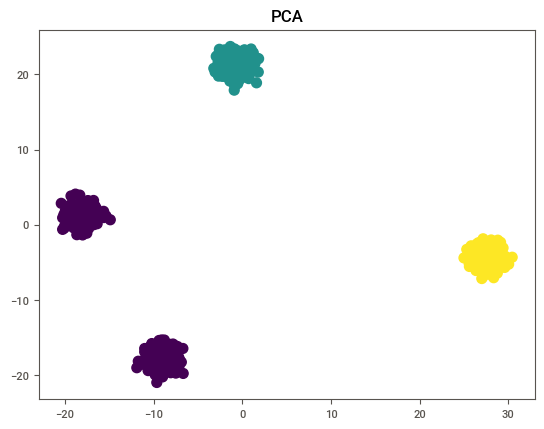

In [55]:
import matplotlib.pyplot as plt
# Plot the results
plt.scatter(pca_df[:, 0],
            pca_df[:, 1],
            c=labels,
            cmap='viridis',
            s=50)
plt.title('PCA')
plt.show()

### New clusters

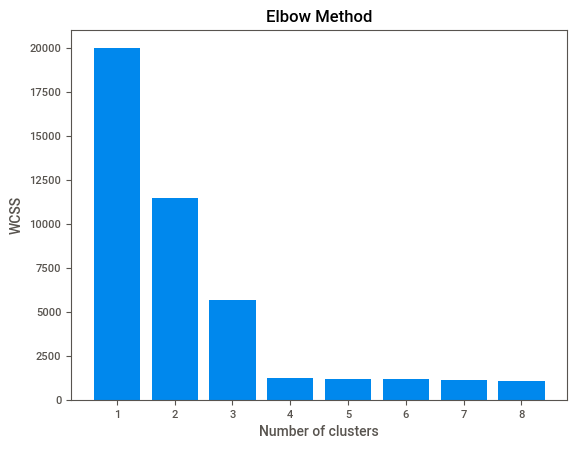

In [58]:
# calculate WCSS for different k values
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot the elbow curve
plt.bar(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Clustering: DBSCAN

In [61]:
from sklearn.cluster import DBSCAN

In [63]:
# Create DBSCAN object
dbscan = DBSCAN(eps=5, min_samples=5)
# Fit the model
dbscan.fit(X)

DBSCAN(eps=5)

In [65]:
pd.Series(dbscan.labels_).value_counts()

 2    246
 3    246
 0    243
 1    240
-1     25
Name: count, dtype: int64

In [67]:
dbscan.labels_[:10]

array([0, 1, 2, 1, 1, 3, 1, 0, 2, 3])

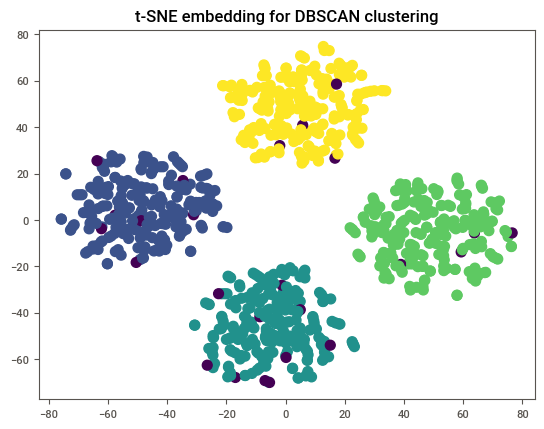

In [69]:
# Plot the results
plt.scatter(X_tsne[:, 0],
            X_tsne[:, 1],
            c=dbscan.labels_,
            cmap='viridis',
            s=50)
plt.title('t-SNE embedding for DBSCAN clustering')
plt.show()

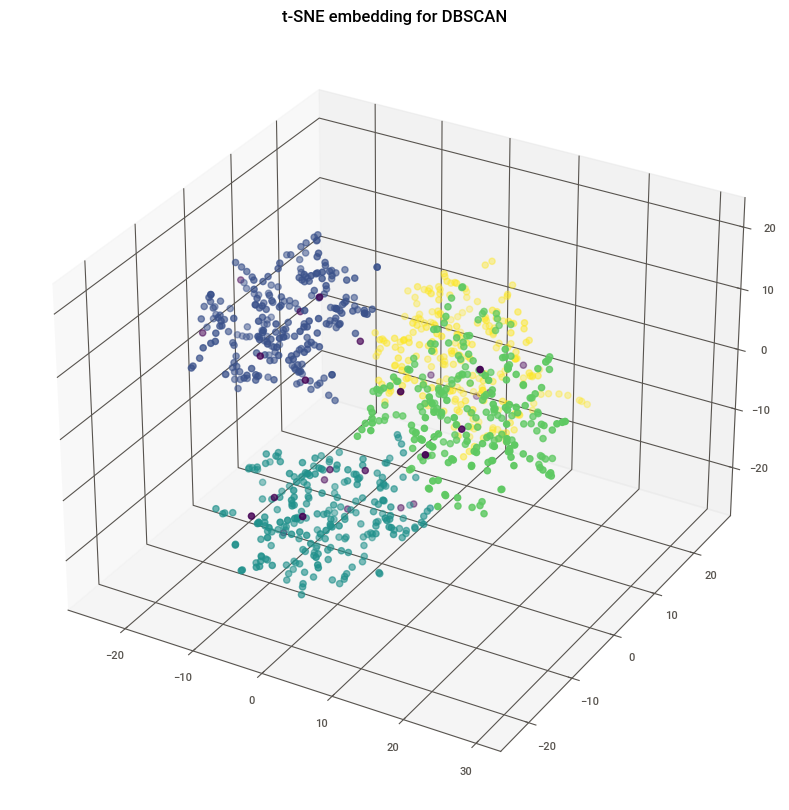

In [71]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(X_tsne_3d[:,0],
             X_tsne_3d[:,1],
             X_tsne_3d[:,2],
              c=dbscan.labels_,
             cmap='viridis')

plt.title("t-SNE embedding for DBSCAN")

# show plot
plt.show()

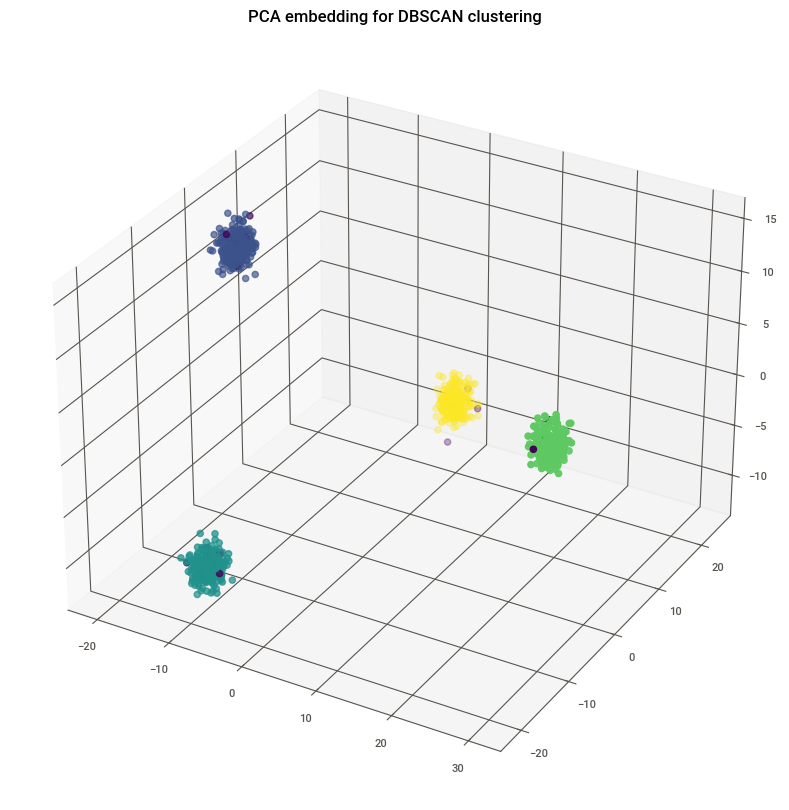

In [73]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(pca_df3[:,0],
             pca_df3[:,1],
             pca_df3[:,2],
             c=dbscan.labels_,
             cmap='viridis')

plt.title("PCA embedding for DBSCAN clustering")

# show plot
plt.show()

## Clustering: Hierarchical clustering & dendrogram

In [76]:
from scipy.cluster import hierarchy

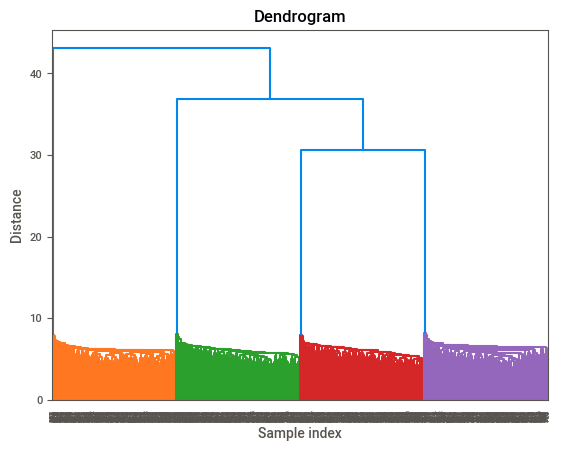

In [78]:
# Compute the pairwise distances between the data points
dist_matrix = hierarchy.distance.pdist(X)

# Perform hierarchical clustering
Z = hierarchy.linkage(dist_matrix, method='average')

# Plot the dendrogram
fig, ax = plt.subplots()
dn = hierarchy.dendrogram(Z, ax=ax)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()